## Independent Project Sandox

In [193]:
library('readxl')
library(psych)
library(tidyverse)
library(sqldf)
library(ggplot2)
library(gridExtra)
library(cowplot)
library(e1071) 
library(car)
library(semTools)
library(pastecs)
library(sjstats) 
library(userfriendlyscience)

Loading required package: lavaan

This is lavaan 0.6-7

lavaan is BETA software! Please report any bugs.


Attaching package: ‘lavaan’


The following object is masked from ‘package:psych’:

    cor2cov


 

###############################################################################

This is semTools 0.5-3

All users of R (or SEM) are invited to submit functions or ideas for functions.

###############################################################################


Attaching package: ‘semTools’


The following object is masked from ‘package:e1071’:

    kurtosis


The following object is masked from ‘package:readr’:

    clipboard


The following object is masked from ‘package:psych’:

    skew



Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is masked from ‘package:tidyr’:

    extract


Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.mer

In [6]:
data <- read_excel('data_academic_performance.xlsx')

New names:
* `` -> ...10



In [43]:
data

COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,...10,⋯,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NA,⋯,71,93,79,181,180,91,5,4,2,2
SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NA,⋯,86,98,78,201,182,92,5,4,4,4
SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NA,⋯,18,43,22,113,113,7,1,1,1,1
SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NA,⋯,76,80,48,137,157,67,4,3,2,2
SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NA,⋯,98,100,71,189,198,98,5,4,4,2
SB11201210007568,F,Complete professional education,Complete professional education,Independent,Executive,Stratum 6,It is not classified by the SISBEN,Three,NA,⋯,32,97,36,170,154,63,4,3,4,2
SB11201210007598,M,Complete professional education,Complete professional education,Small entrepreneur,Executive,Stratum 5,It is not classified by the SISBEN,Four,NA,⋯,50,92,53,187,152,59,3,3,2,2
SB11201210007615,F,Incomplete Secundary,Complete Secundary,Entrepreneur,Independent professional,Stratum 6,It is not classified by the SISBEN,Five,NA,⋯,94,97,98,188,200,99,5,4,4,4
SB11201210010208,M,Complete Secundary,Complete professional education,Independent,Operator,Stratum 2,It is not classified by the SISBEN,Three,NA,⋯,43,3,19,177,133,28,2,2,3,2


In [48]:
df<-data

In [36]:
names(df)

[1] "COD_S11"          "GENDER"           "EDU_FATHER"       "EDU_MOTHER"      
 [5] "OCC_FATHER"       "OCC_MOTHER"       "STRATUM"          "SISBEN"          
 [9] "PEOPLE_HOUSE"     "...10"            "INTERNET"         "TV"              
[13] "COMPUTER"         "WASHING_MCH"      "MIC_OVEN"         "CAR"             
[17] "DVD"              "FRESH"            "PHONE"            "MOBILE"          
[21] "REVENUE"          "JOB"              "SCHOOL_NAME"      "SCHOOL_NAT"      
[25] "SCHOOL_TYPE"      "MAT_S11"          "CR_S11"           "CC_S11"          
[29] "BIO_S11"          "ENG_S11"          "Cod_SPro"         "UNIVERSITY"      
[33] "ACADEMIC_PROGRAM" "QR_PRO"           "CR_PRO"           "CC_PRO"          
[37] "ENG_PRO"          "WC_PRO"           "FEP_PRO"          "G_SC"            
[41] "PERCENTILE"       "2ND_DECILE"       "QUARTILE"         "SEL"             
[45] "SEL_IHE"

In [49]:
# to summarise the data properally, convert characters to factors
# df[] <- lapply( df, factor)
col_names <- c('GENDER','EDU_FATHER','EDU_MOTHER','OCC_FATHER','OCC_MOTHER','STRATUM','SISBEN','PEOPLE_HOUSE','INTERNET','TV','COMPUTER','WASHING_MCH','MIC_OVEN','CAR','DVD','FRESH','PHONE','MOBILE','REVENUE','JOB','SCHOOL_NAME','SCHOOL_NAT','SCHOOL_TYPE','Cod_SPro','UNIVERSITY','ACADEMIC_PROGRAM')

In [50]:
df[col_names] <- lapply(df[col_names] , factor)

In [51]:
df

COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,...10,⋯,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NA,⋯,71,93,79,181,180,91,5,4,2,2
SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NA,⋯,86,98,78,201,182,92,5,4,4,4
SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NA,⋯,18,43,22,113,113,7,1,1,1,1
SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NA,⋯,76,80,48,137,157,67,4,3,2,2
SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NA,⋯,98,100,71,189,198,98,5,4,4,2
SB11201210007568,F,Complete professional education,Complete professional education,Independent,Executive,Stratum 6,It is not classified by the SISBEN,Three,NA,⋯,32,97,36,170,154,63,4,3,4,2
SB11201210007598,M,Complete professional education,Complete professional education,Small entrepreneur,Executive,Stratum 5,It is not classified by the SISBEN,Four,NA,⋯,50,92,53,187,152,59,3,3,2,2
SB11201210007615,F,Incomplete Secundary,Complete Secundary,Entrepreneur,Independent professional,Stratum 6,It is not classified by the SISBEN,Five,NA,⋯,94,97,98,188,200,99,5,4,4,4
SB11201210010208,M,Complete Secundary,Complete professional education,Independent,Operator,Stratum 2,It is not classified by the SISBEN,Three,NA,⋯,43,3,19,177,133,28,2,2,3,2


In [52]:
summary(df)

   COD_S11          GENDER                              EDU_FATHER  
 Length:12411       F:5043   Complete professional education :3016  
 Class :character   M:7368   Complete Secundary              :2843  
 Mode  :character            Complete technique or technology:1194  
                             Incomplete Secundary            :1091  
                             Postgraduate education          :1085  
                             Complete primary                : 824  
                             (Other)                         :2358  
                            EDU_MOTHER  
 Complete Secundary              :3106  
 Complete professional education :3059  
 Complete technique or technology:1495  
 Incomplete Secundary            :1056  
 Postgraduate education          : 997  
 Complete primary                : 713  
 (Other)                         :1985  
                                    OCC_FATHER  
 Independent                             :2907  
 Technical or professi

In [59]:
# selecting only the variables of interest
filter_data <- sqldf('select GENDER, EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,
                        SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC FROM df')

In [60]:
filter_data

GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,⋯,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,86,82,180
F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,100,88,182
M,Not sure,Not sure,Independent,Home,Level 2,Five,No,No,Yes,⋯,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,46,42,113
F,Not sure,Not sure,Other occupation,Independent,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,64,73,157
M,Complete professional education,Complete professional education,Executive,Home,It is not classified by the SISBEN,One,Yes,Yes,Yes,⋯,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,85,92,198
F,Complete professional education,Complete professional education,Independent,Executive,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,60,61,82,154
M,Complete professional education,Complete professional education,Small entrepreneur,Executive,It is not classified by the SISBEN,Four,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,75,75,85,152
F,Incomplete Secundary,Complete Secundary,Entrepreneur,Independent professional,It is not classified by the SISBEN,Five,Yes,Yes,Yes,⋯,No,10 or more LMMW,No,PRIVATE,ACADEMIC,74,67,85,96,200
M,Complete Secundary,Complete professional education,Independent,Operator,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,TECHNICAL,44,54,44,46,133


In [61]:
summary(filter_data)

 GENDER                              EDU_FATHER  
 F:5043   Complete professional education :3016  
 M:7368   Complete Secundary              :2843  
          Complete technique or technology:1194  
          Incomplete Secundary            :1091  
          Postgraduate education          :1085  
          Complete primary                : 824  
          (Other)                         :2358  
                            EDU_MOTHER  
 Complete Secundary              :3106  
 Complete professional education :3059  
 Complete technique or technology:1495  
 Incomplete Secundary            :1056  
 Postgraduate education          : 997  
 Complete primary                : 713  
 (Other)                         :1985  
                                    OCC_FATHER  
 Independent                             :2907  
 Technical or professional level employee:1803  
 Operator                                :1537  
 Other occupation                        :1087  
 Executive                 

In [62]:
cat_data <- sqldf('select GENDER, EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,
                        SCHOOL_NAT,SCHOOL_TYPE from df')

In [63]:
cat_data

GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC
F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC
M,Not sure,Not sure,Independent,Home,Level 2,Five,No,No,Yes,Yes,No,No,Yes,Yes,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC
F,Not sure,Not sure,Other occupation,Independent,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC
M,Complete professional education,Complete professional education,Executive,Home,It is not classified by the SISBEN,One,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC
F,Complete professional education,Complete professional education,Independent,Executive,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC
M,Complete professional education,Complete professional education,Small entrepreneur,Executive,It is not classified by the SISBEN,Four,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC
F,Incomplete Secundary,Complete Secundary,Entrepreneur,Independent professional,It is not classified by the SISBEN,Five,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,10 or more LMMW,No,PRIVATE,ACADEMIC
M,Complete Secundary,Complete professional education,Independent,Operator,It is not classified by the SISBEN,Three,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,TECHNICAL


In [64]:
# Categorical data barcharts
bar_cat_plot_list <- list()
col_names <- colnames(cat_data)
for(i in col_names){
#     print(i)
    gg <- ggplot(cat_data, aes_string(x = i)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1, size=5))
    bar_cat_plot_list[[i]] <- gg
} # end of loop

In [68]:
options(repr.plot.width = 16, repr.plot.height = 10)

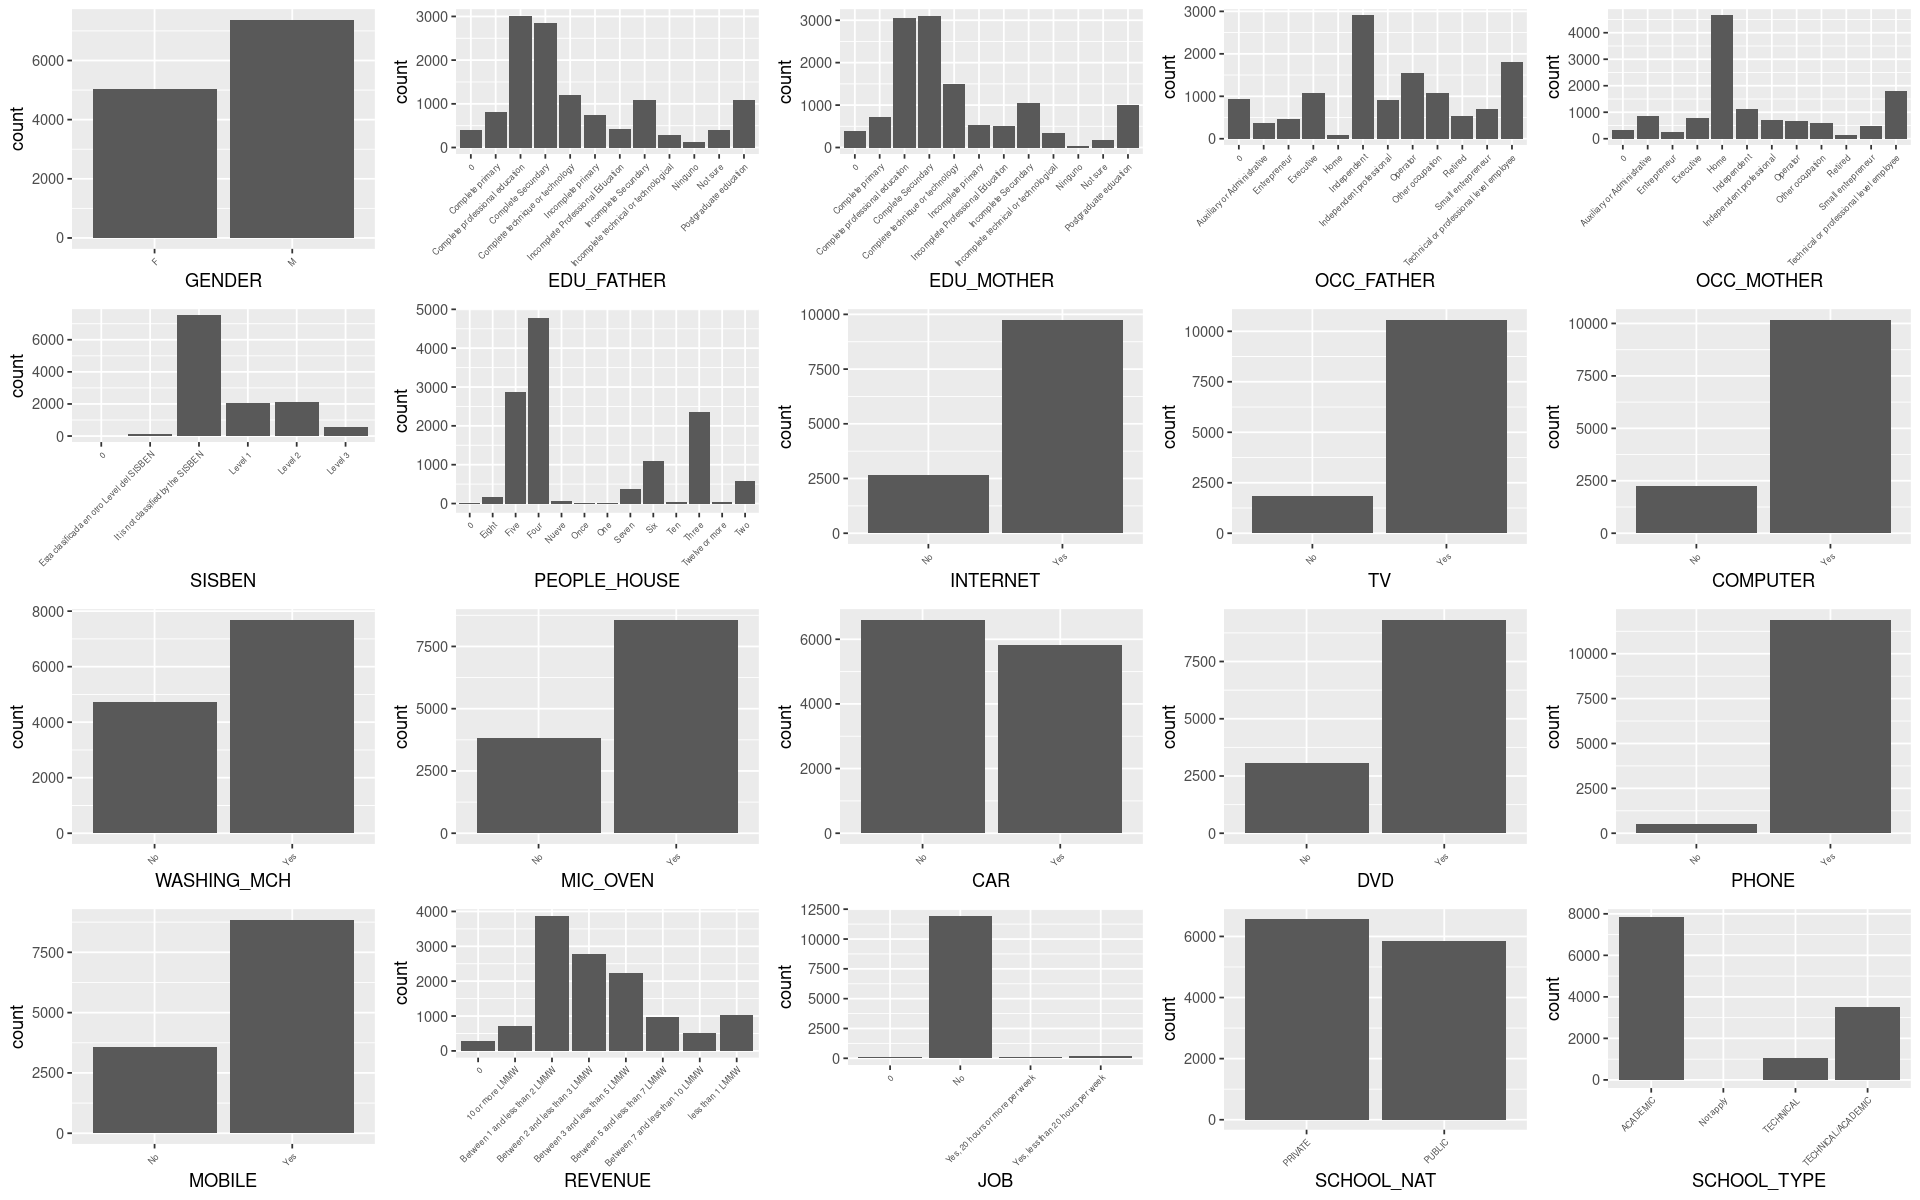

In [69]:
plot_grid(plotlist = bar_cat_plot_list)

In [70]:
sqldf('select count(JOB) from cat_data where JOB == 0')

count(JOB)
<int>
138


In [76]:
sqldf('select distinct(people_house) from cat_data')

PEOPLE_HOUSE
<fct>
Three
Five
One
Four
Six
Two
Twelve or more
Nueve
Eight


In [77]:
sqldf('select count(people_house) from cat_data where people_house == 0')

count(people_house)
<int>
21


In [78]:
cont_data <- sqldf('select MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC from df')

In [80]:
describe(cont_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MAT_S11,1,12411,64.32076,11.87365,64,63.83624,11.8608,26,100,74,0.39946028,0.12886390,0.10658126
CR_S11,2,12411,60.77842,10.02588,61,60.62846,10.3782,24,100,76,0.21419352,0.47665834,0.08999511
BIO_S11,3,12411,63.95053,11.15687,64,63.64568,10.3782,11,100,89,0.30329883,0.29791111,0.10014723
ENG_S11,4,12411,61.80106,14.29778,59,60.76866,14.8260,26,100,74,0.60676163,-0.37157362,0.12834091
G_SC,5,12411,162.71050,23.11248,163,162.93947,23.7216,37,247,210,-0.09539073,-0.07629832,0.20746419


In [85]:
sqldf('select count(MAT_S11) from cont_data where MAT_S11 is null')
sqldf('select count(CR_S11) from cont_data where CR_S11 is null')
sqldf('select count(BIO_S11) from cont_data where BIO_S11 is null')
sqldf('select count(ENG_S11) from cont_data where ENG_S11 is null')
sqldf('select count(G_SC) from cont_data where G_SC is null')

count(MAT_S11)
<int>
0


count(CR_S11)
<int>
0


count(BIO_S11)
<int>
0


count(ENG_S11)
<int>
0


count(G_SC)
<int>
0


In [89]:
col_names <- colnames(cont_data)
col_names

[1] "MAT_S11" "CR_S11"  "BIO_S11" "ENG_S11" "G_SC"

In [94]:
# hold all the plots created in the loop
plot_list <- list()
col_names <- colnames(cont_data)
for(i in col_names){
    print(i)
    print(mean(cont_data[,i]))
    gg <- ggplot(cont_data , aes_string(i))  
    gg <- gg + geom_histogram(binwidth=1, colour="black", aes(y=..density.., fill=..count..))
    gg<-gg+scale_fill_gradient("Count", low="#DCDCDC", high="#7C7C7C")
    gg<-gg+stat_function(fun=dnorm, color="red",args=list(mean=mean(cont_data[,i], na.rm=TRUE), sd=sd(cont_data[,i], na.rm=TRUE)))
    plot_list[[i]] <- gg
} # end of loop

[1] "MAT_S11"
[1] 64.32076
[1] "CR_S11"
[1] 60.77842
[1] "BIO_S11"
[1] 63.95053
[1] "ENG_S11"
[1] 61.80106
[1] "G_SC"
[1] 162.7105


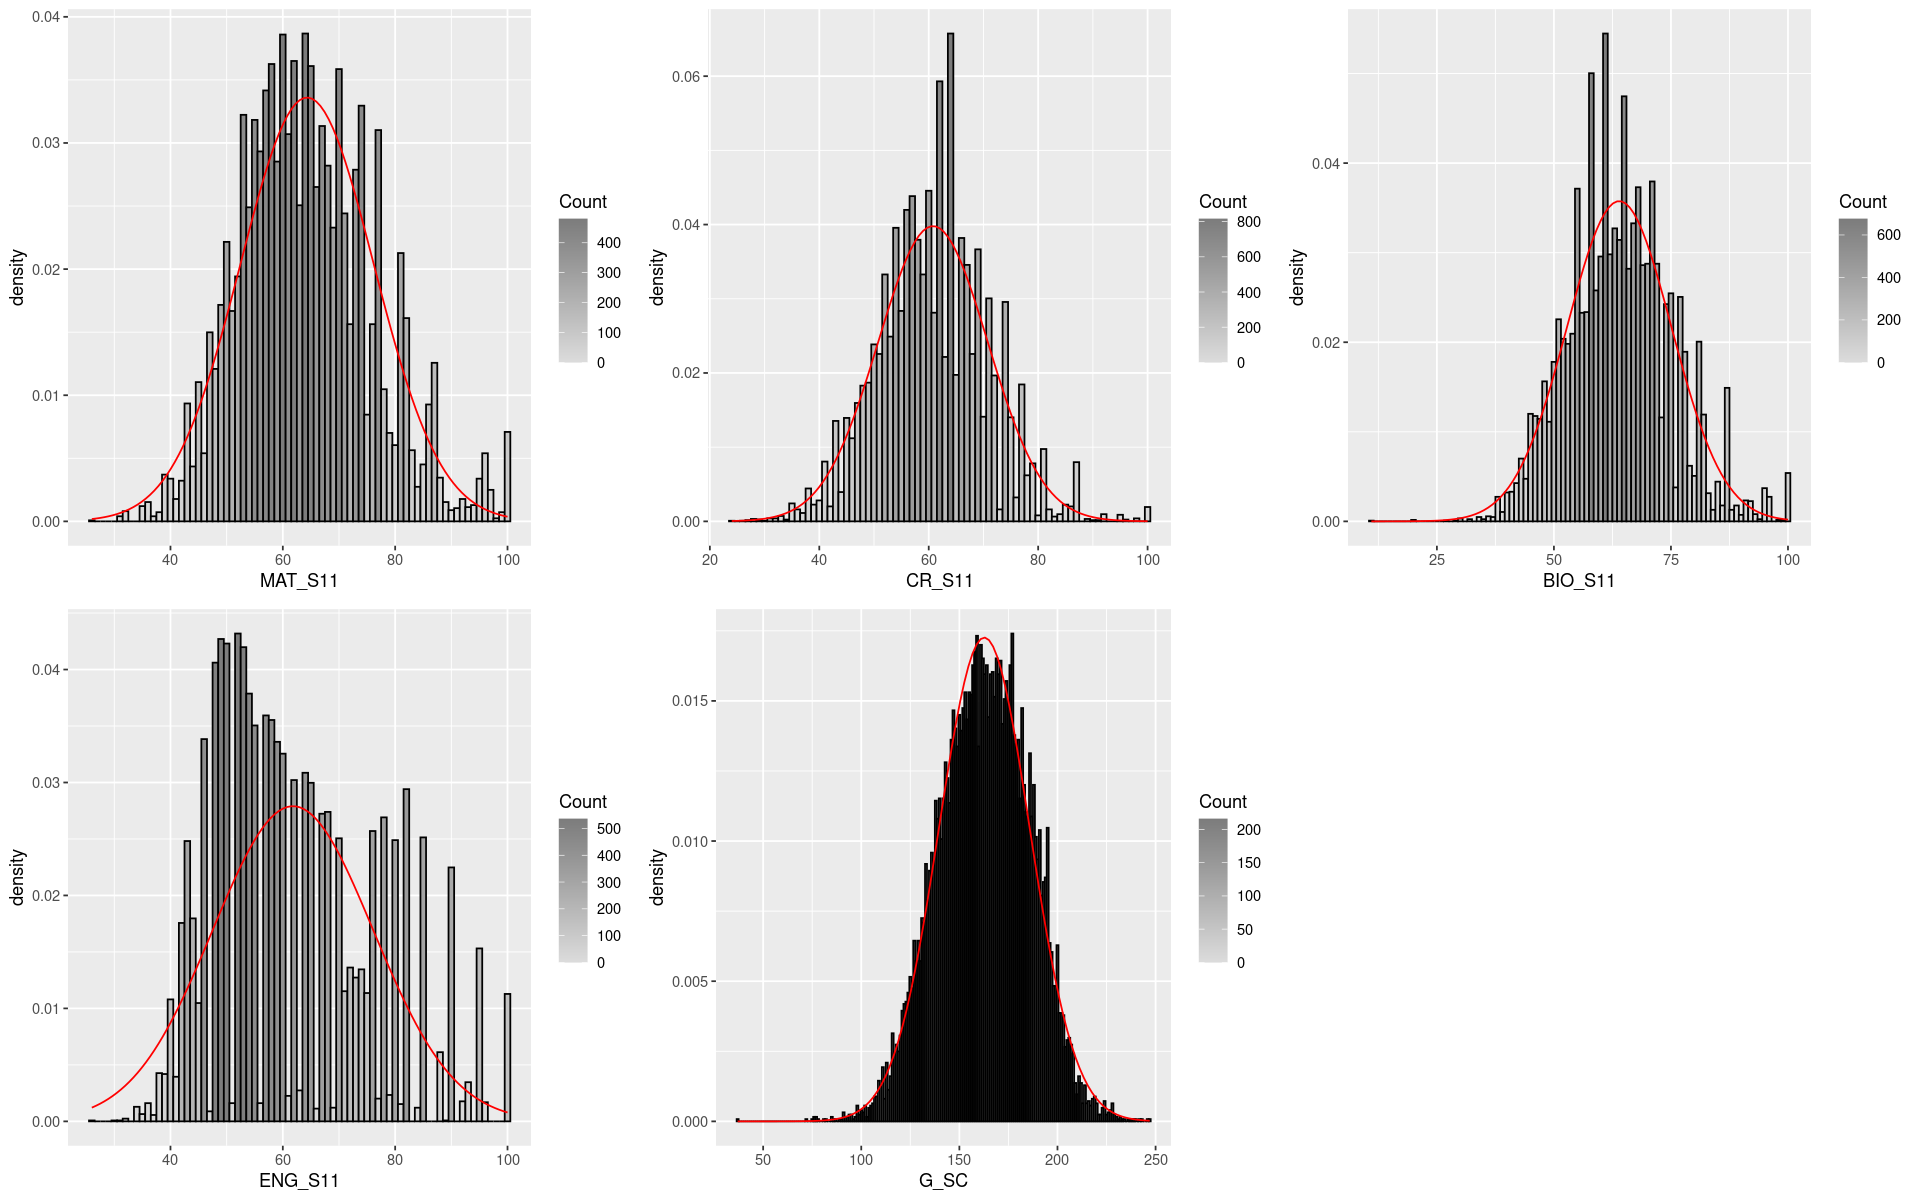

In [95]:
plot_grid(plotlist = plot_list)

In [96]:
# hold all theplots created in the loop
box_plot_list <- list()
for(i in col_names){
    print(i)
    gg <- ggplot(cont_data, aes_string(y=i)) + geom_boxplot() + theme(text = element_text(size=20))
    box_plot_list[[i]] <- gg
} # end of loop

[1] "MAT_S11"
[1] "CR_S11"
[1] "BIO_S11"
[1] "ENG_S11"
[1] "G_SC"


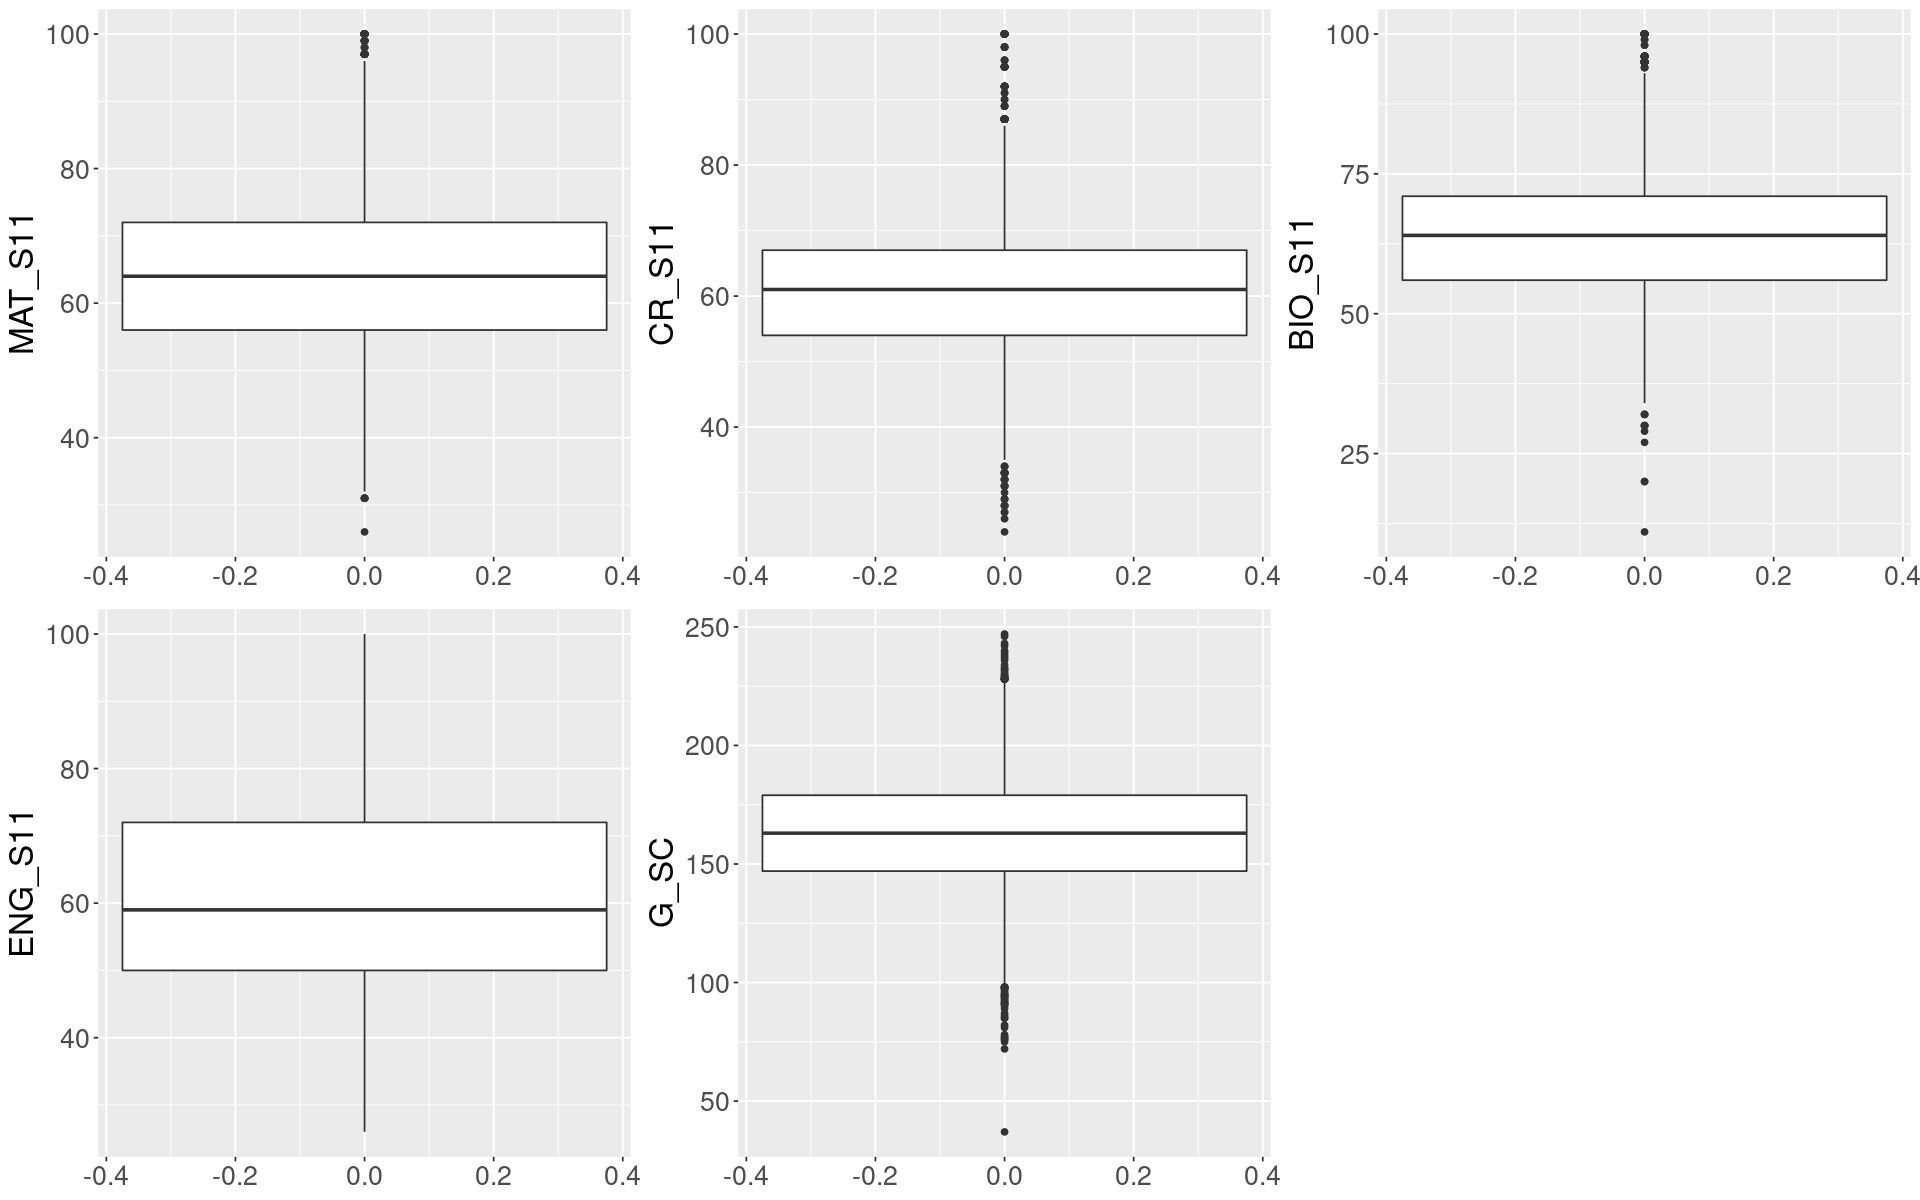

In [97]:
plot_grid(plotlist = box_plot_list)

In [99]:
# make sure to remove missing values and outliers

In [98]:
head(cont_data)

,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,71,81,86,82,180
2,83,75,100,88,182
3,52,49,46,42,113
4,56,55,64,73,157
5,80,65,85,92,198
6,71,60,61,82,154


ERROR: Error in qqnorm(cont_data$MAT_S11, main = "MAT_S11") + qqline(cont_data$MAT_S11, : non-numeric argument to binary operator


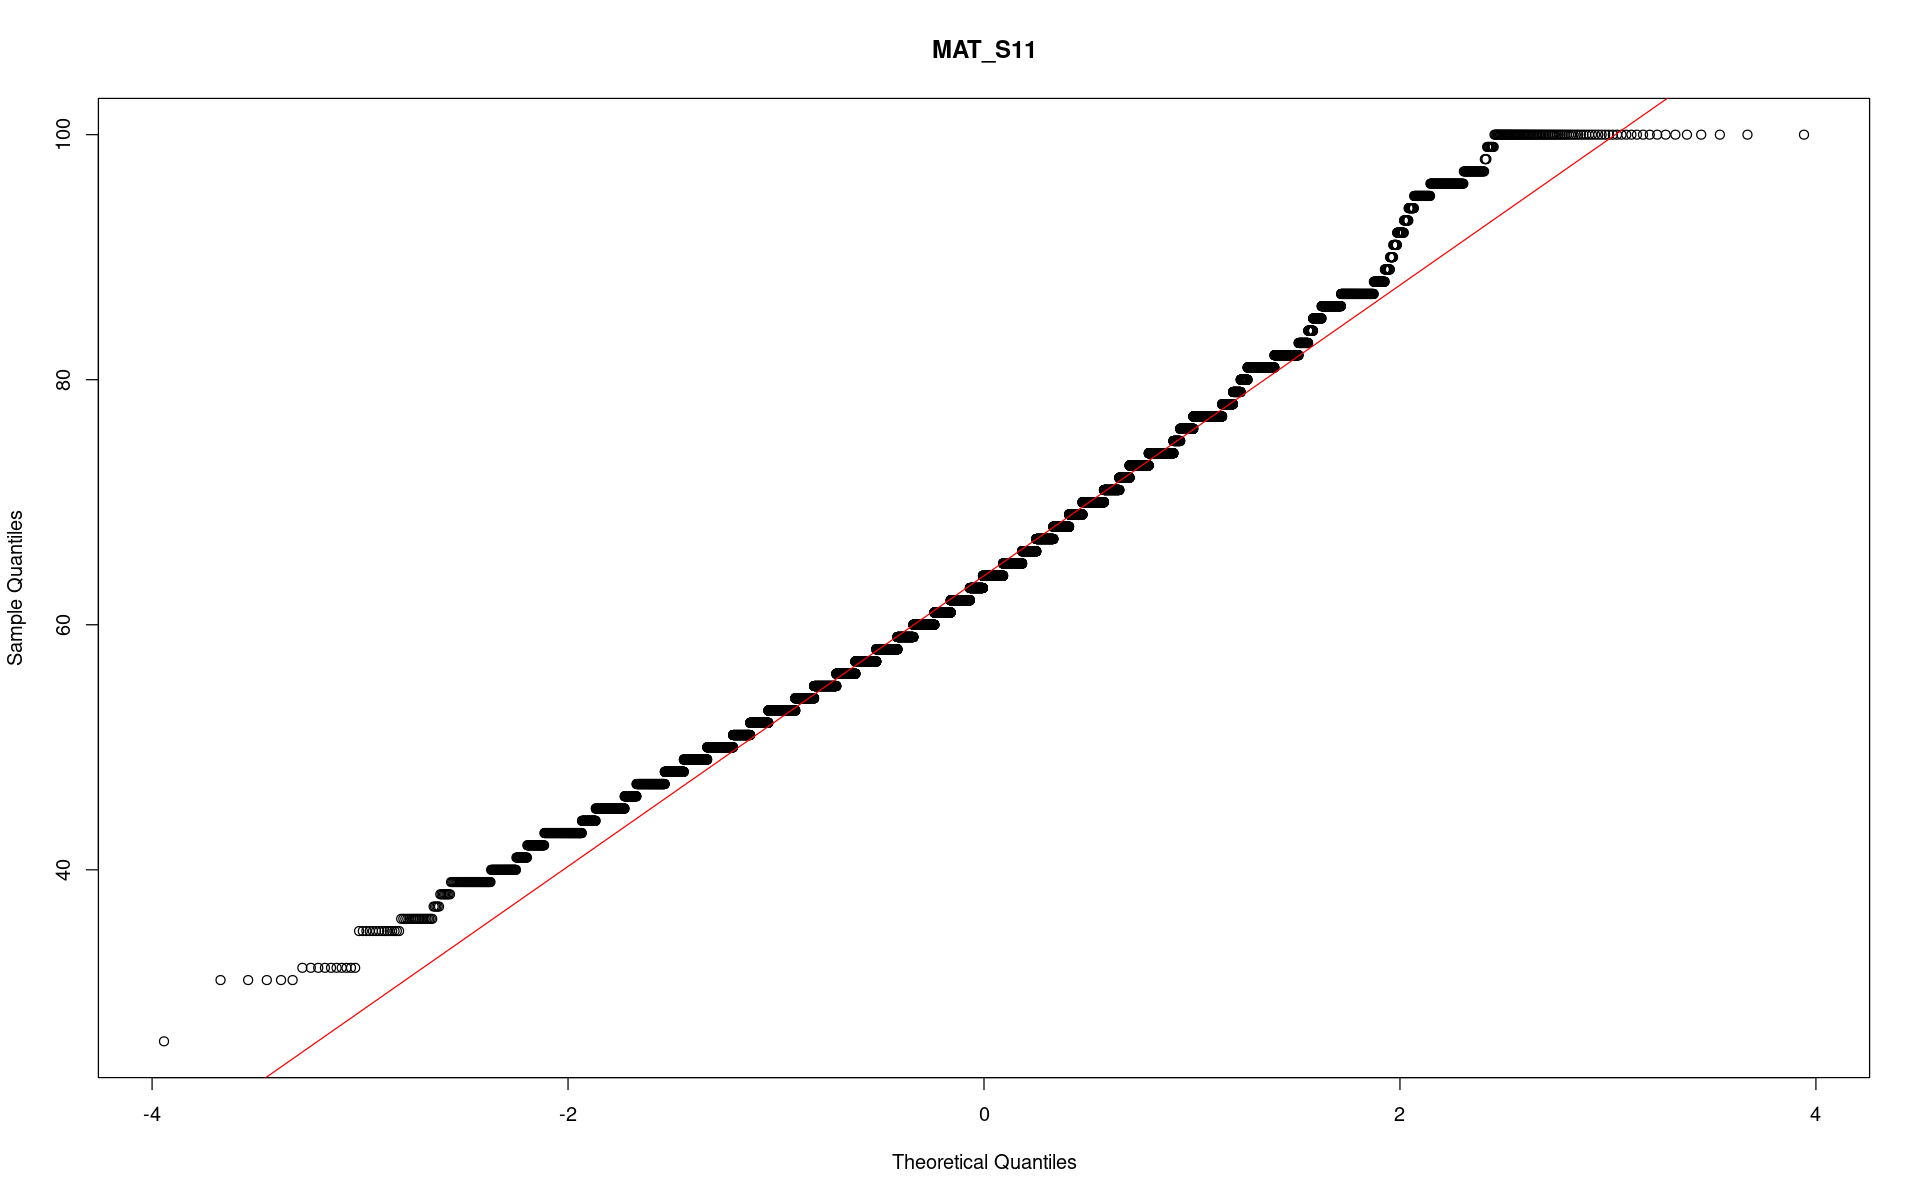

In [100]:
# qq plot for each numerical data above
qqnorm(cont_data$MAT_S11 ,main='MAT_S11')+qqline(cont_data$MAT_S11, col=2) #show a line on theplot

ERROR: Error in qqnorm(cont_data$CR_S11, main = "CR_S11") + qqline(cont_data$CR_S11, : non-numeric argument to binary operator


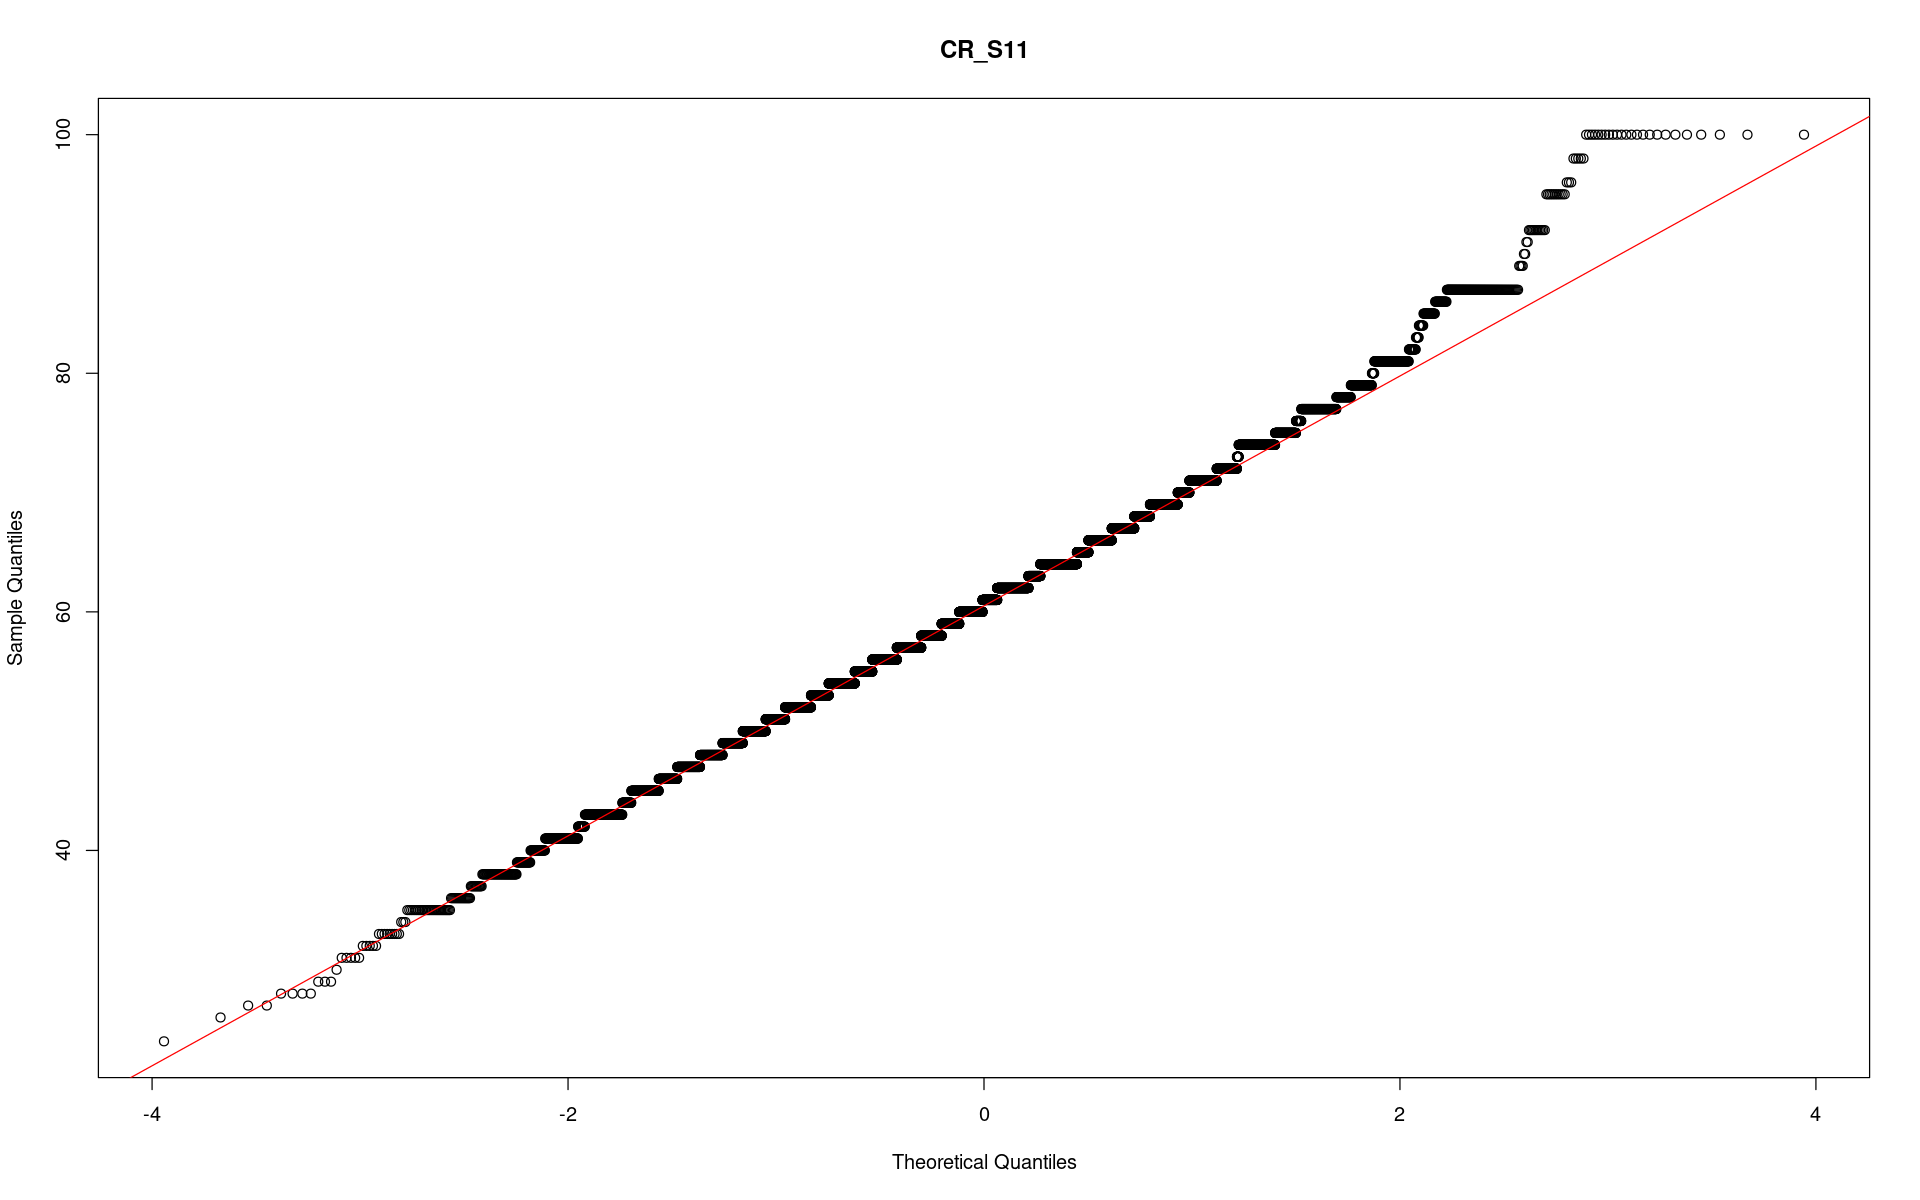

In [101]:
qqnorm(cont_data$CR_S11 ,main='CR_S11')+qqline(cont_data$CR_S11, col=2) #show a line on theplot

ERROR: Error in qqnorm(cont_data$BIO_S11, main = "BIO_S11") + qqline(cont_data$BIO_S11, : non-numeric argument to binary operator


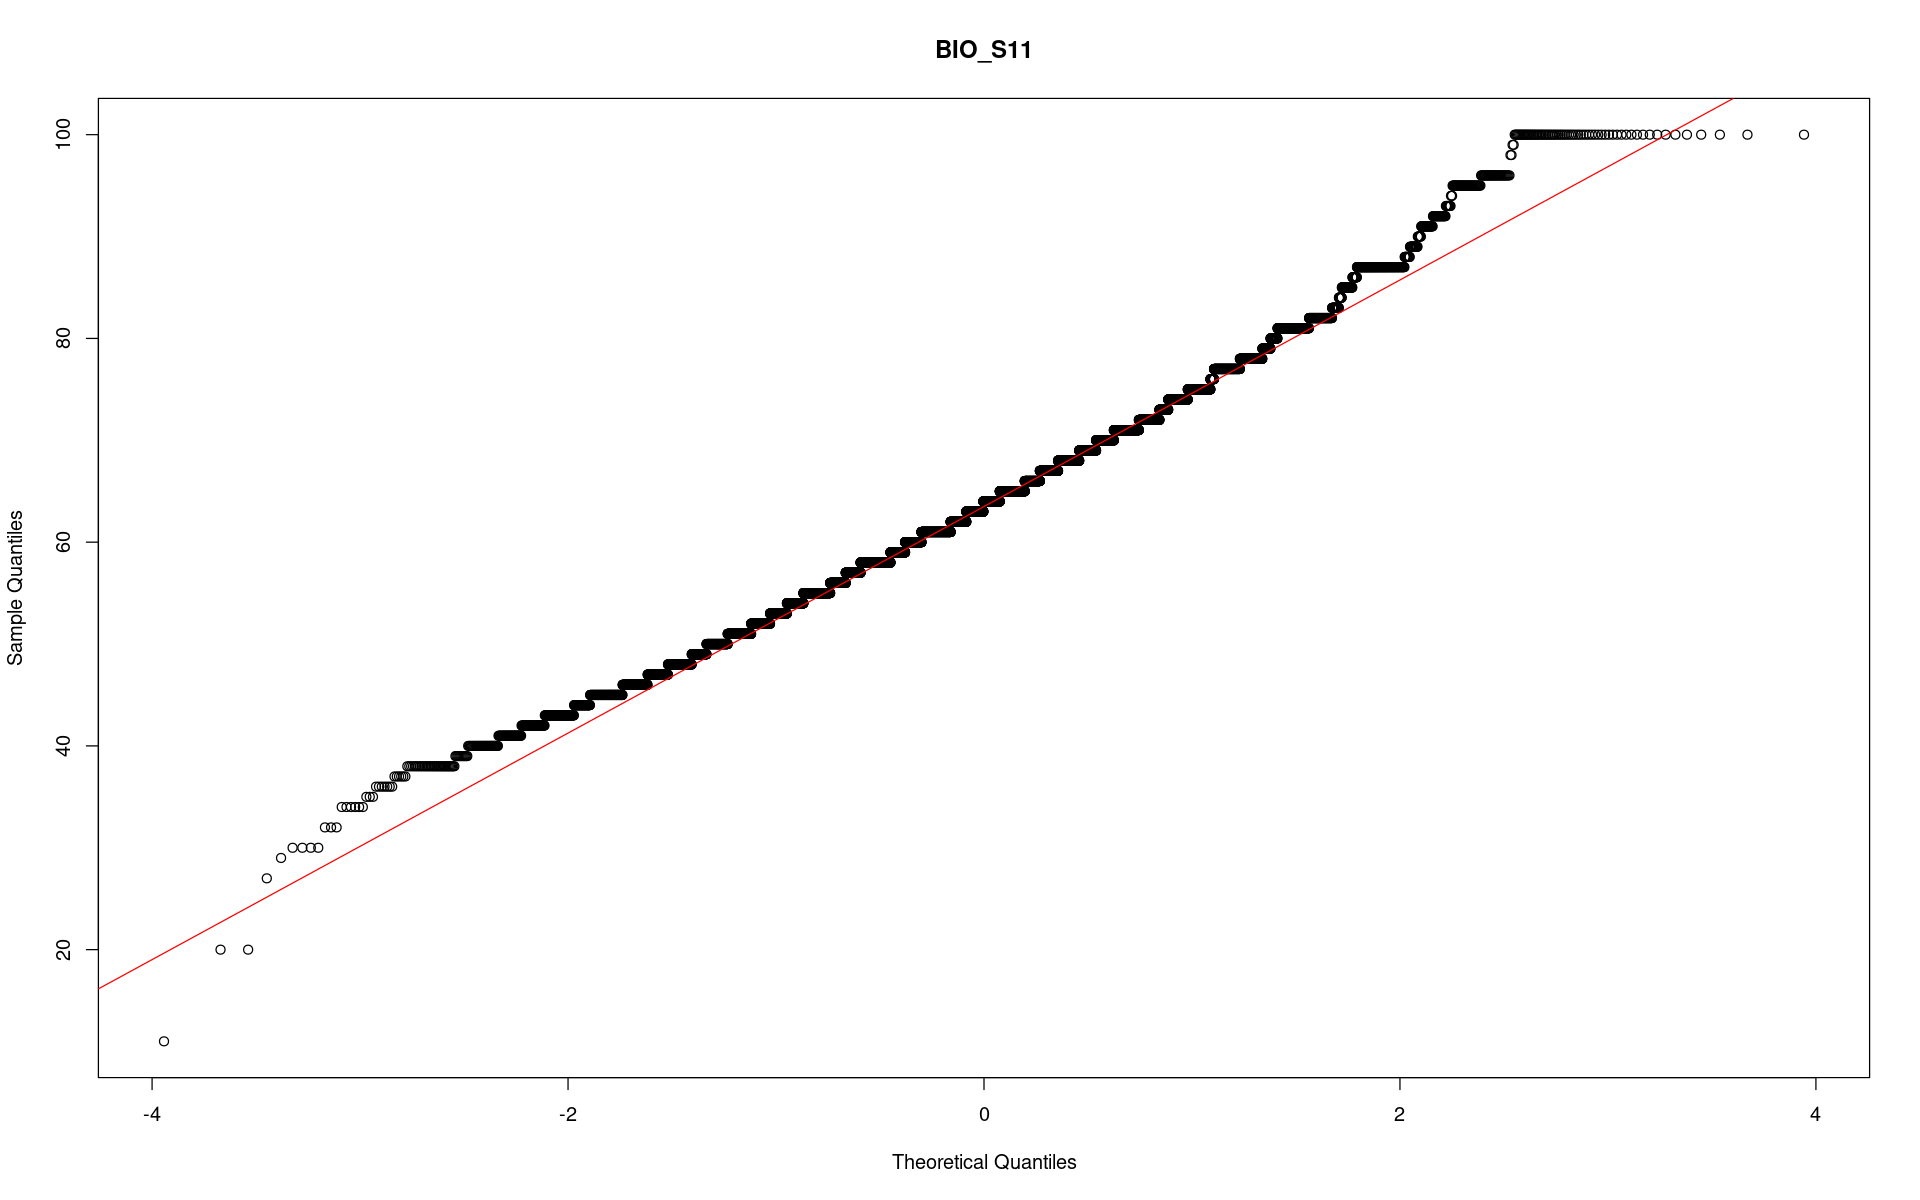

In [102]:
qqnorm(cont_data$BIO_S11 ,main='BIO_S11')+qqline(cont_data$BIO_S11, col=2) #show a line on theplot

ERROR: Error in qqnorm(cont_data$ENG_S11, main = "ENG_S11") + qqline(cont_data$ENG_S11, : non-numeric argument to binary operator


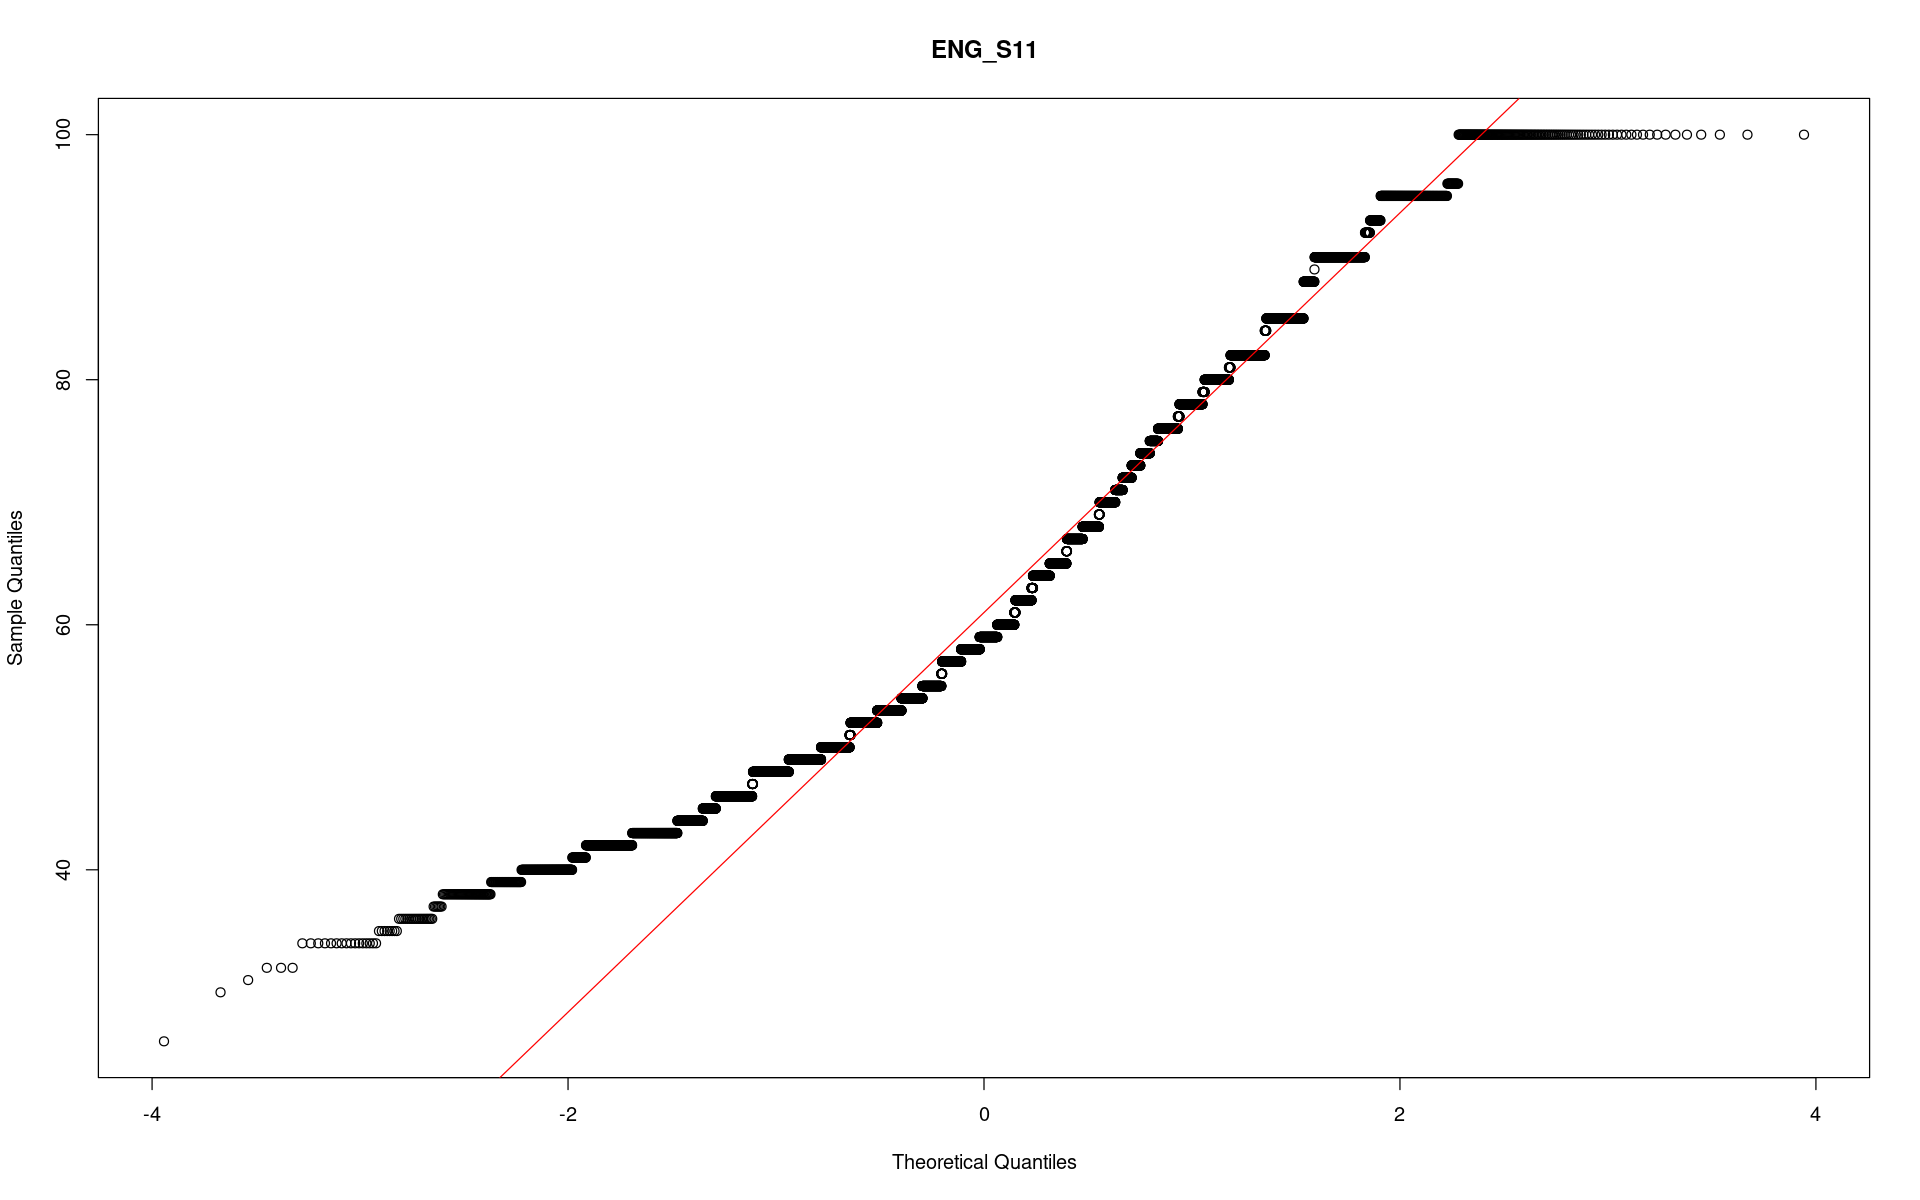

In [103]:
qqnorm(cont_data$ENG_S11 ,main='ENG_S11')+qqline(cont_data$ENG_S11, col=2) #show a line on theplot

ERROR: Error in qqnorm(cont_data$G_SC, main = "G_SC") + qqline(cont_data$G_SC, : non-numeric argument to binary operator


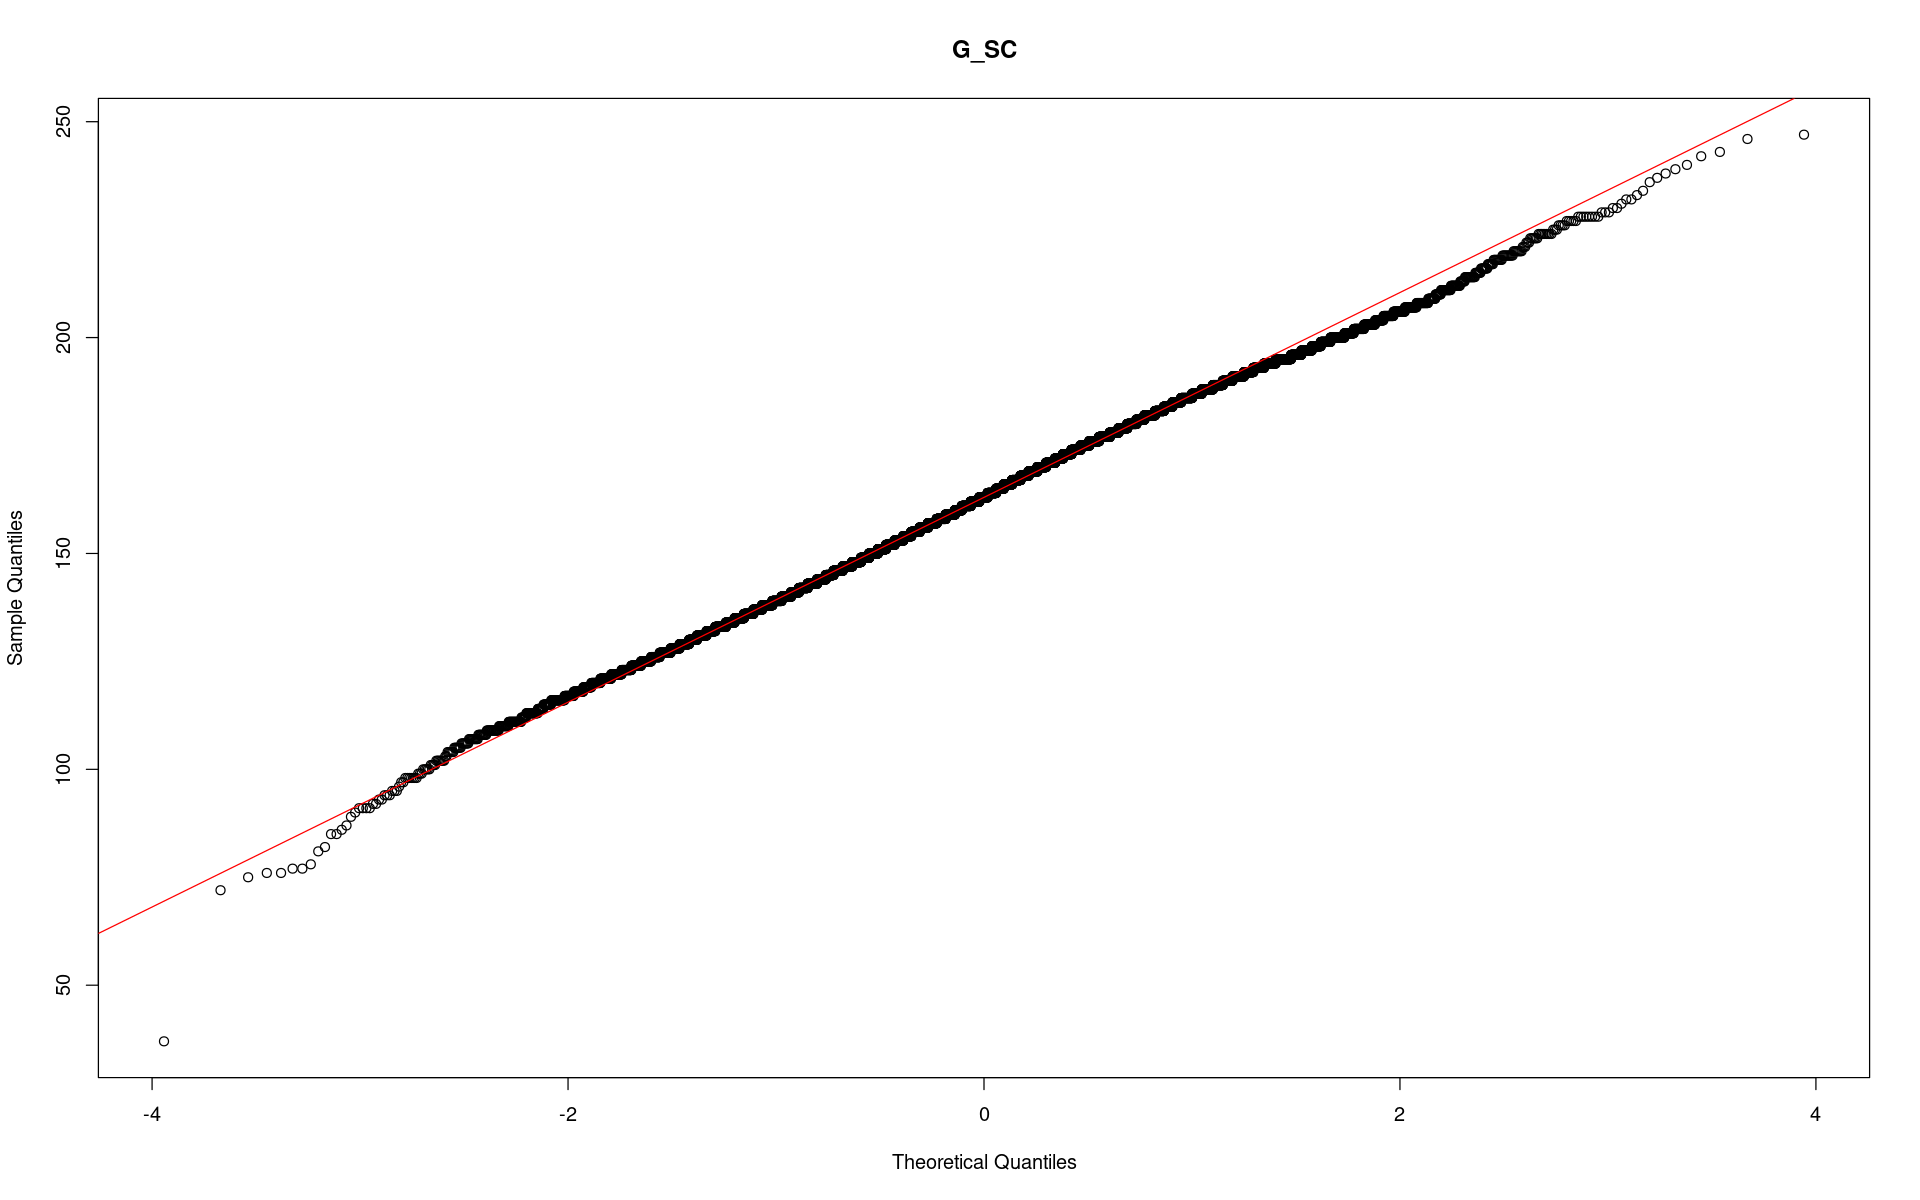

In [104]:
qqnorm(cont_data$G_SC ,main='G_SC')+qqline(cont_data$G_SC, col=2) #show a line on theplot

In [106]:
# removig data that is NA,using complete.cases in case i missed finding data with Null values
head(filter_data)

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,⋯,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,86,82,180
2,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,100,88,182
3,M,Not sure,Not sure,Independent,Home,Level 2,Five,No,No,Yes,⋯,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,46,42,113
4,F,Not sure,Not sure,Other occupation,Independent,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,64,73,157
5,M,Complete professional education,Complete professional education,Executive,Home,It is not classified by the SISBEN,One,Yes,Yes,Yes,⋯,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,85,92,198
6,F,Complete professional education,Complete professional education,Independent,Executive,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,60,61,82,154


In [110]:
filter_data<-filter_data[complete.cases(filter_data),]

In [111]:
filter_data

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,⋯,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,86,82,180
2,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,100,88,182
3,M,Not sure,Not sure,Independent,Home,Level 2,Five,No,No,Yes,⋯,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,46,42,113
4,F,Not sure,Not sure,Other occupation,Independent,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,64,73,157
5,M,Complete professional education,Complete professional education,Executive,Home,It is not classified by the SISBEN,One,Yes,Yes,Yes,⋯,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,85,92,198
6,F,Complete professional education,Complete professional education,Independent,Executive,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,60,61,82,154
7,M,Complete professional education,Complete professional education,Small entrepreneur,Executive,It is not classified by the SISBEN,Four,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,75,75,85,152
8,F,Incomplete Secundary,Complete Secundary,Entrepreneur,Independent professional,It is not classified by the SISBEN,Five,Yes,Yes,Yes,⋯,No,10 or more LMMW,No,PRIVATE,ACADEMIC,74,67,85,96,200
9,M,Complete Secundary,Complete professional education,Independent,Operator,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,TECHNICAL,44,54,44,46,133


In [256]:
# Remove the missing values in Job and people_house
clean_data <- filter_data

In [253]:
clean_data <- clean_data[!(clean_data$JOB == "0"),]

In [254]:
clean_data <- clean_data[!(clean_data$PEOPLE_HOUSE == "0"),]

In [244]:
clean_data <- clean_data[!(clean_data$EDU_FATHER == "0"),]

In [142]:
clean_data

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,⋯,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,86,82,180
2,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,100,88,182
3,M,Not sure,Not sure,Independent,Home,Level 2,Five,No,No,Yes,⋯,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,46,42,113
4,F,Not sure,Not sure,Other occupation,Independent,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,64,73,157
5,M,Complete professional education,Complete professional education,Executive,Home,It is not classified by the SISBEN,One,Yes,Yes,Yes,⋯,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,85,92,198
6,F,Complete professional education,Complete professional education,Independent,Executive,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,60,61,82,154
7,M,Complete professional education,Complete professional education,Small entrepreneur,Executive,It is not classified by the SISBEN,Four,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,75,75,85,152
8,F,Incomplete Secundary,Complete Secundary,Entrepreneur,Independent professional,It is not classified by the SISBEN,Five,Yes,Yes,Yes,⋯,No,10 or more LMMW,No,PRIVATE,ACADEMIC,74,67,85,96,200
9,M,Complete Secundary,Complete professional education,Independent,Operator,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,TECHNICAL,44,54,44,46,133


In [131]:
head(clean_data)

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,⋯,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,86,82,180
2,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,100,88,182
3,M,Not sure,Not sure,Independent,Home,Level 2,Five,No,No,Yes,⋯,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,46,42,113
4,F,Not sure,Not sure,Other occupation,Independent,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,64,73,157
5,M,Complete professional education,Complete professional education,Executive,Home,It is not classified by the SISBEN,One,Yes,Yes,Yes,⋯,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,85,92,198
6,F,Complete professional education,Complete professional education,Independent,Executive,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,60,61,82,154


In [151]:
library('dvmisc')

Loading required package: rbenchmark


Attaching package: ‘dvmisc’


The following object is masked from ‘package:tidyr’:

    expand_grid


The following object is masked from ‘package:psych’:

    headtail




In [168]:
# Getting Kurtosis and skew values of Maths, also standardised score:
math_skew <- semTools::skew(clean_data$MAT_S11)
math_kurt <- semTools::kurtosis(clean_data$MAT_S11)

# standardise the values
math_skew[1]/math_skew[2]
math_kurt[1]/math_kurt[2]

math_score_range<- abs(scale(clean_data$MAT_S11))

FSA::perc(as.numeric(math_score_range), 1.96, "gt")
FSA::perc(as.numeric(math_score_range), 3.29, "gt") #0%

skew (g1) 
 17.86063

Excess Kur (g2) 
       2.813369

[1] 4.473234

[1] 0

In [166]:
y <- trim(clean_data$MAT_S11, p = 0.05)

In [167]:
# Getting Kurtosis and skew values of Maths, also standardised score:
math_skew <- semTools::skew(y)
math_kurt <- semTools::kurtosis(y)

# standardise the values
math_skew[1]/math_skew[2]
math_kurt[1]/math_kurt[2]

math_score_range<- abs(scale(y))

FSA::perc(as.numeric(math_score_range), 1.96, "gt")
FSA::perc(as.numeric(math_score_range), 3.29, "gt") #0%

skew (g1) 
 10.28942

Excess Kur (g2) 
      -16.22801

[1] 2.454757

[1] 0

In [141]:
# Getting Kurtosis and skew values of Maths, also standardised score:
math_skew <- semTools::skew(clean_data$MAT_S11)
math_kurt <- semTools::kurtosis(clean_data$MAT_S11)

# standardise the values
math_skew[1]/math_skew[2]
math_kurt[1]/math_kurt[2]

math_score_range<- abs(scale(clean_data$MAT_S11))

FSA::perc(as.numeric(math_score_range), 1.96, "gt")
FSA::perc(as.numeric(math_score_range), 3.29, "gt") #0%

skew (g1) 
 17.86063

Excess Kur (g2) 
       2.813369

[1] 4.473234

[1] 0

In [136]:
# Getting Kurtosis and skew values of Critical reading, also standardised score:
reading_skew <- semTools::skew(clean_data$CR_S11)
reading_kurt <- semTools::kurtosis(clean_data$CR_S11)

# standardise the values
reading_skew[1]/reading_skew[2]
reading_kurt[1]/reading_kurt[2]

reading_score_range<- abs(scale(clean_data$CR_S11))

FSA::perc(as.numeric(reading_score_range), 1.96, "gt")
FSA::perc(as.numeric(reading_score_range), 3.29, "gt") #0%

skew (g1) 
 9.855563

Excess Kur (g2) 
       10.56296

[1] 5.565061

[1] 0.3748065

In [169]:
y <- trim(clean_data$CR_S11, p = 0.05)

In [170]:
# Getting Kurtosis and skew values of Critical reading, also standardised score:
reading_skew <- semTools::skew(y)
reading_kurt <- semTools::kurtosis(y)

# standardise the values
reading_skew[1]/reading_skew[2]
reading_kurt[1]/reading_kurt[2]

reading_score_range<- abs(scale(y))

FSA::perc(as.numeric(reading_score_range), 1.96, "gt")
FSA::perc(as.numeric(reading_score_range), 3.29, "gt") #0%

skew (g1) 
 2.329608

Excess Kur (g2) 
      -16.19697

[1] 3.562797

[1] 0

In [137]:
# Getting Kurtosis and skew values of Biology, also standardised score:
biology_skew <- semTools::skew(clean_data$BIO_S11)
biology_kurt <- semTools::kurtosis(clean_data$BIO_S11)

# standardise the values
biology_skew[1]/biology_skew[2]
biology_kurt[1]/biology_kurt[2]

biology_score_range<- abs(scale(clean_data$BIO_S11))

FSA::perc(as.numeric(biology_score_range), 1.96, "gt")
FSA::perc(as.numeric(biology_score_range), 3.29, "gt") #0%

skew (g1) 
 13.59188

Excess Kur (g2) 
       6.895763

[1] 5.589505

[1] 0.0325919

In [159]:
y <- trim(clean_data$BIO_S11, p = 0.05)

In [160]:
# Getting Kurtosis and skew values of Biology, also standardised score:
biology_skew <- semTools::skew(y)
biology_kurt <- semTools::kurtosis(y)

# standardise the values
biology_skew[1]/biology_skew[2]
biology_kurt[1]/biology_kurt[2]

biology_score_range<- abs(scale(y))

FSA::perc(as.numeric(biology_score_range), 1.96, "gt")
FSA::perc(as.numeric(biology_score_range), 3.29, "gt") #0%

skew (g1) 
 2.967384

Excess Kur (g2) 
      -15.90372

[1] 4.832946

[1] 0

In [138]:
# Getting Kurtosis and skew values of English, also standardised score:
english_skew <- semTools::skew(clean_data$ENG_S11)
english_kurt <- semTools::kurtosis(clean_data$ENG_S11)

# standardise the values
english_skew[1]/english_skew[2]
english_kurt[1]/english_kurt[2]

english_score_range<- abs(scale(clean_data$ENG_S11))

FSA::perc(as.numeric(english_score_range), 1.96, "gt")
FSA::perc(as.numeric(english_score_range), 3.29, "gt") #0%

skew (g1) 
 27.21207

Excess Kur (g2) 
      -8.650761

[1] 5.711725

[1] 0

In [171]:
y <- trim(clean_data$ENG_S11, p = 0.05)

In [172]:
# Getting Kurtosis and skew values of English, also standardised score:
english_skew <- semTools::skew(y)
english_kurt <- semTools::kurtosis(y)

# standardise the values
english_skew[1]/english_skew[2]
english_kurt[1]/english_kurt[2]

english_score_range<- abs(scale(y))

FSA::perc(as.numeric(english_score_range), 1.96, "gt")
FSA::perc(as.numeric(english_score_range), 3.29, "gt") #0%

skew (g1) 
 22.44596

Excess Kur (g2) 
      -16.06778

[1] 3.149606

[1] 0

In [139]:
# Getting Kurtosis and skew values of Global score, also standardised score:
global_skew <- semTools::skew(clean_data$G_SC)
global_kurt <- semTools::kurtosis(clean_data$G_SC)

# standardise the values
global_skew[1]/global_skew[2]
global_kurt[1]/global_kurt[2]

global_score_range<- abs(scale(clean_data$G_SC))

FSA::perc(as.numeric(global_score_range), 1.96, "gt")
FSA::perc(as.numeric(global_score_range), 3.29, "gt") #0%

skew (g1) 
-4.308258

Excess Kur (g2) 
      -1.927135

[1] 4.057688

[1] 0.1466634

In [173]:
y <- trim(clean_data$G_SC, p = 0.05)

In [174]:
# Getting Kurtosis and skew values of Global score, also standardised score:
global_skew <- semTools::skew(y)
global_kurt <- semTools::kurtosis(y)

# standardise the values
global_skew[1]/global_skew[2]
global_kurt[1]/global_kurt[2]

global_score_range<- abs(scale(y))

FSA::perc(as.numeric(global_score_range), 1.96, "gt")
FSA::perc(as.numeric(global_score_range), 3.29, "gt") #0%

skew (g1) 
-2.474329

Excess Kur (g2) 
      -19.67128

[1] 1.110409

[1] 0

In [144]:
sd(clean_data$MAT_S11)   

[1] 11.88489

## Correlation tests and pearsons test

Warning message:
“Use of `clean_data$MAT_S11` is discouraged. Use `MAT_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
Warning message:
“Use of `clean_data$MAT_S11` is discouraged. Use `MAT_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
`geom_smooth()` using formula 'y ~ x'



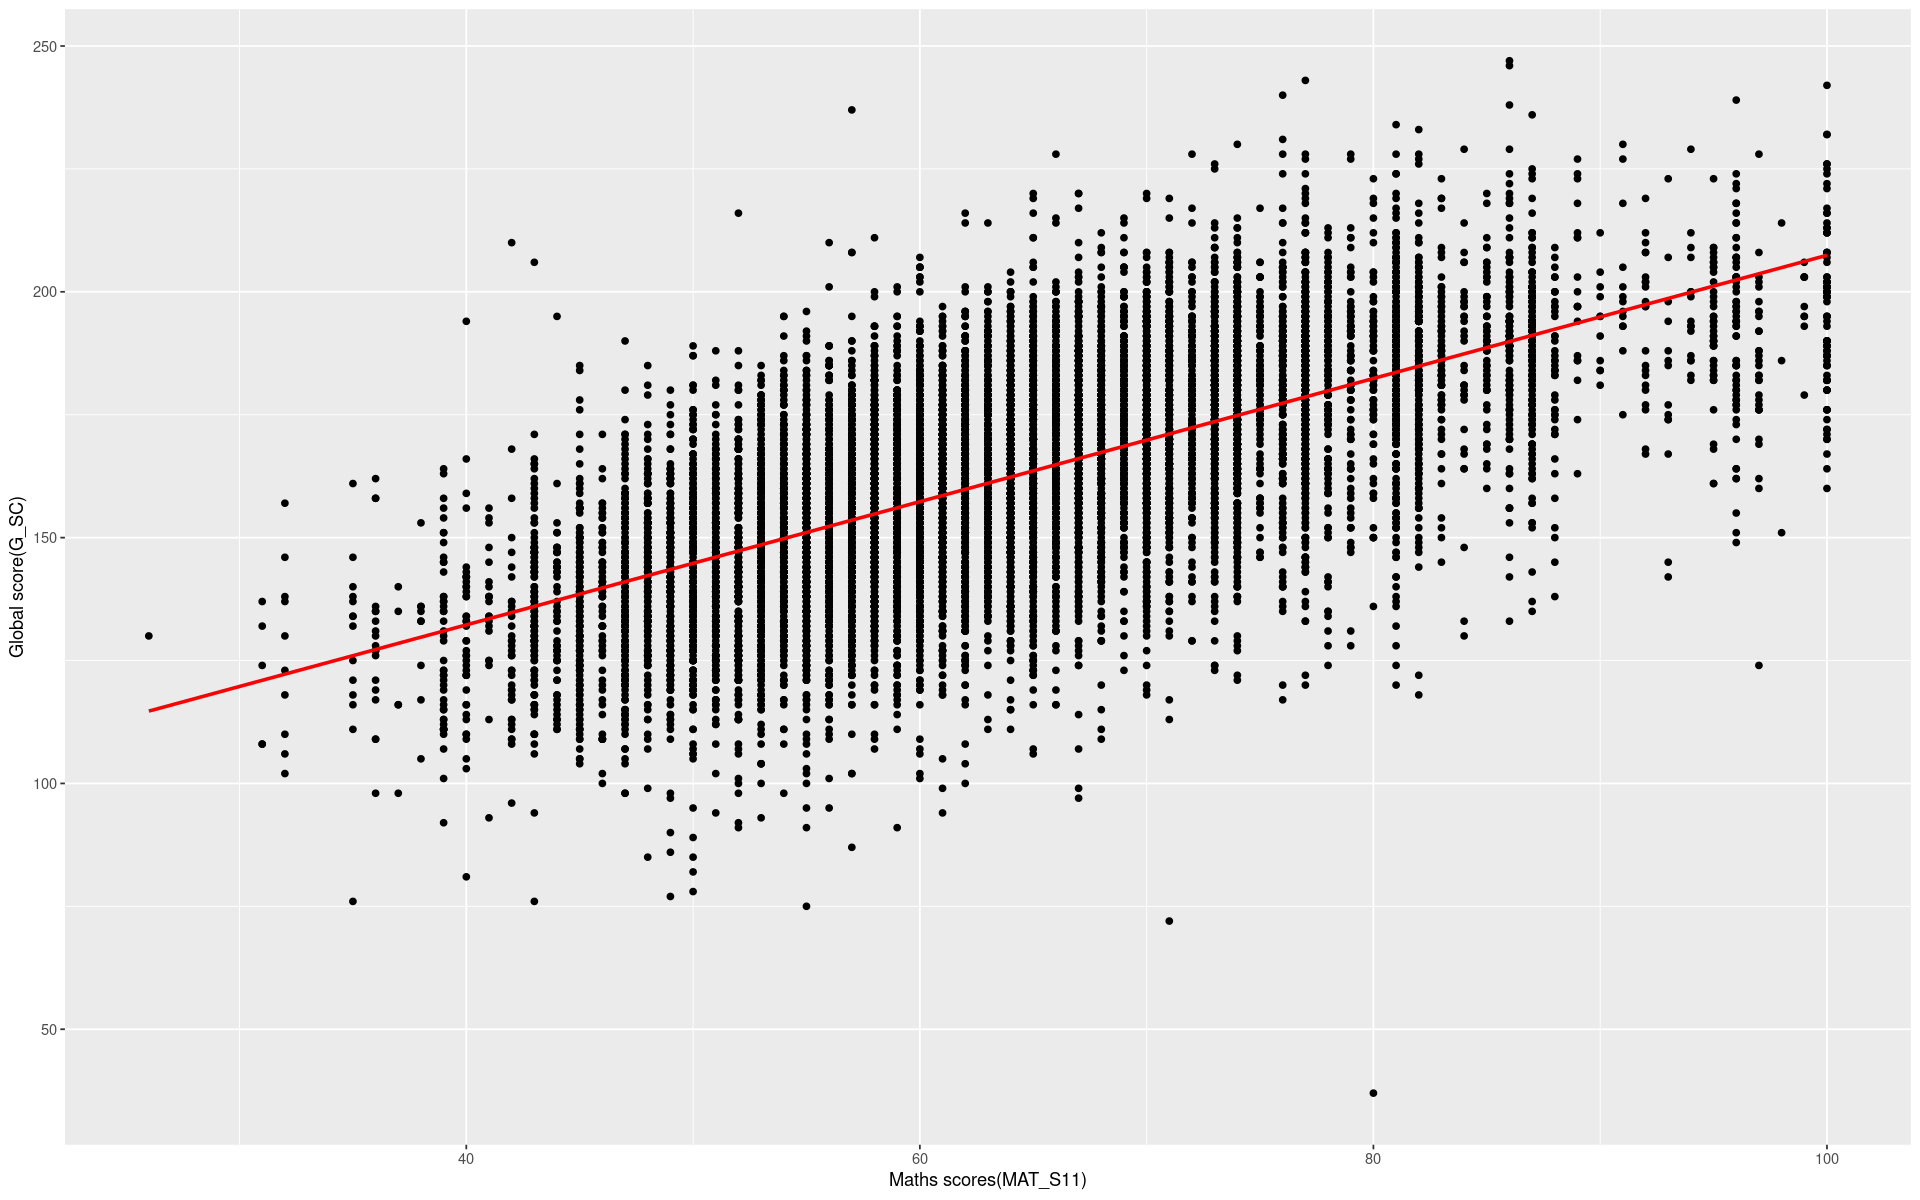

In [178]:
#Scatterplot relationship, G_SC and MAT_S11
scatter <- ggplot(clean_data, aes(clean_data$MAT_S11, clean_data$G_SC))

#Add a regression line
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red", se = F) + labs(x = "Maths scores(MAT_S11)", y = "Global score(G_SC)") 


In [186]:
# Pearson Maths
stats::cor.test(clean_data$G_SC, clean_data$MAT_S11, method='pearson')


	Pearson's product-moment correlation

data:  clean_data$G_SC and clean_data$MAT_S11
t = 93.29, df = 12271, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6336888 0.6543934
sample estimates:
      cor 
0.6441591 


Warning message:
“Use of `clean_data$CR_S11` is discouraged. Use `CR_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
Warning message:
“Use of `clean_data$CR_S11` is discouraged. Use `CR_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
`geom_smooth()` using formula 'y ~ x'



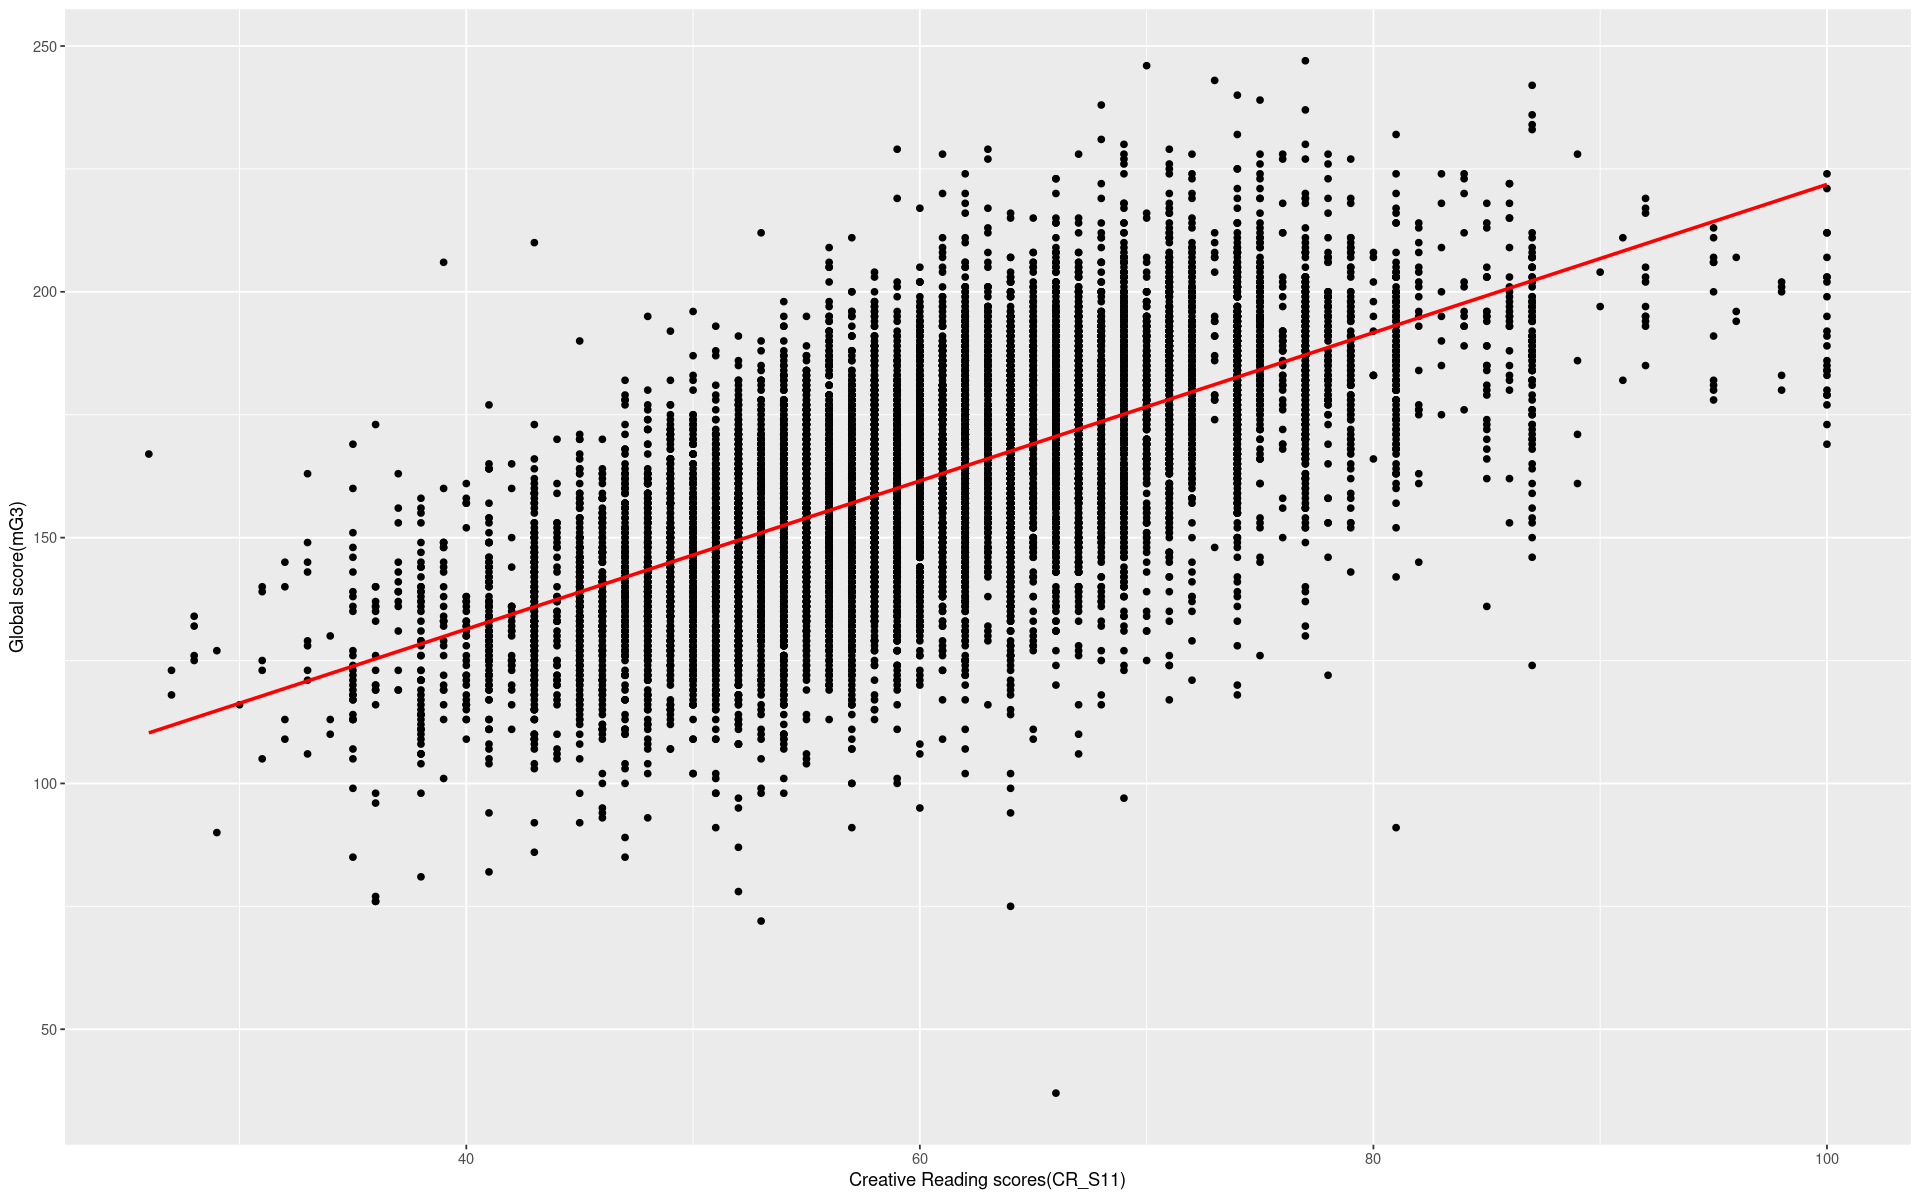

In [179]:
#Scatterplot relationship, G_SC and CR_S11
scatter <- ggplot(clean_data, aes(clean_data$CR_S11, clean_data$G_SC))

#Add a regression line
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red", se = F) + labs(x = "Creative Reading scores(CR_S11)", y = "Global score(G_SC)") 


In [187]:
# Pearson test Creative reading
stats::cor.test(clean_data$G_SC, clean_data$CR_S11, method='pearson')
# statistically significant result



	Pearson's product-moment correlation

data:  clean_data$G_SC and clean_data$CR_S11
t = 95.658, df = 12271, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6433255 0.6635975
sample estimates:
      cor 
0.6535787 


Warning message:
“Use of `clean_data$BIO_S11` is discouraged. Use `BIO_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
Warning message:
“Use of `clean_data$BIO_S11` is discouraged. Use `BIO_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
`geom_smooth()` using formula 'y ~ x'



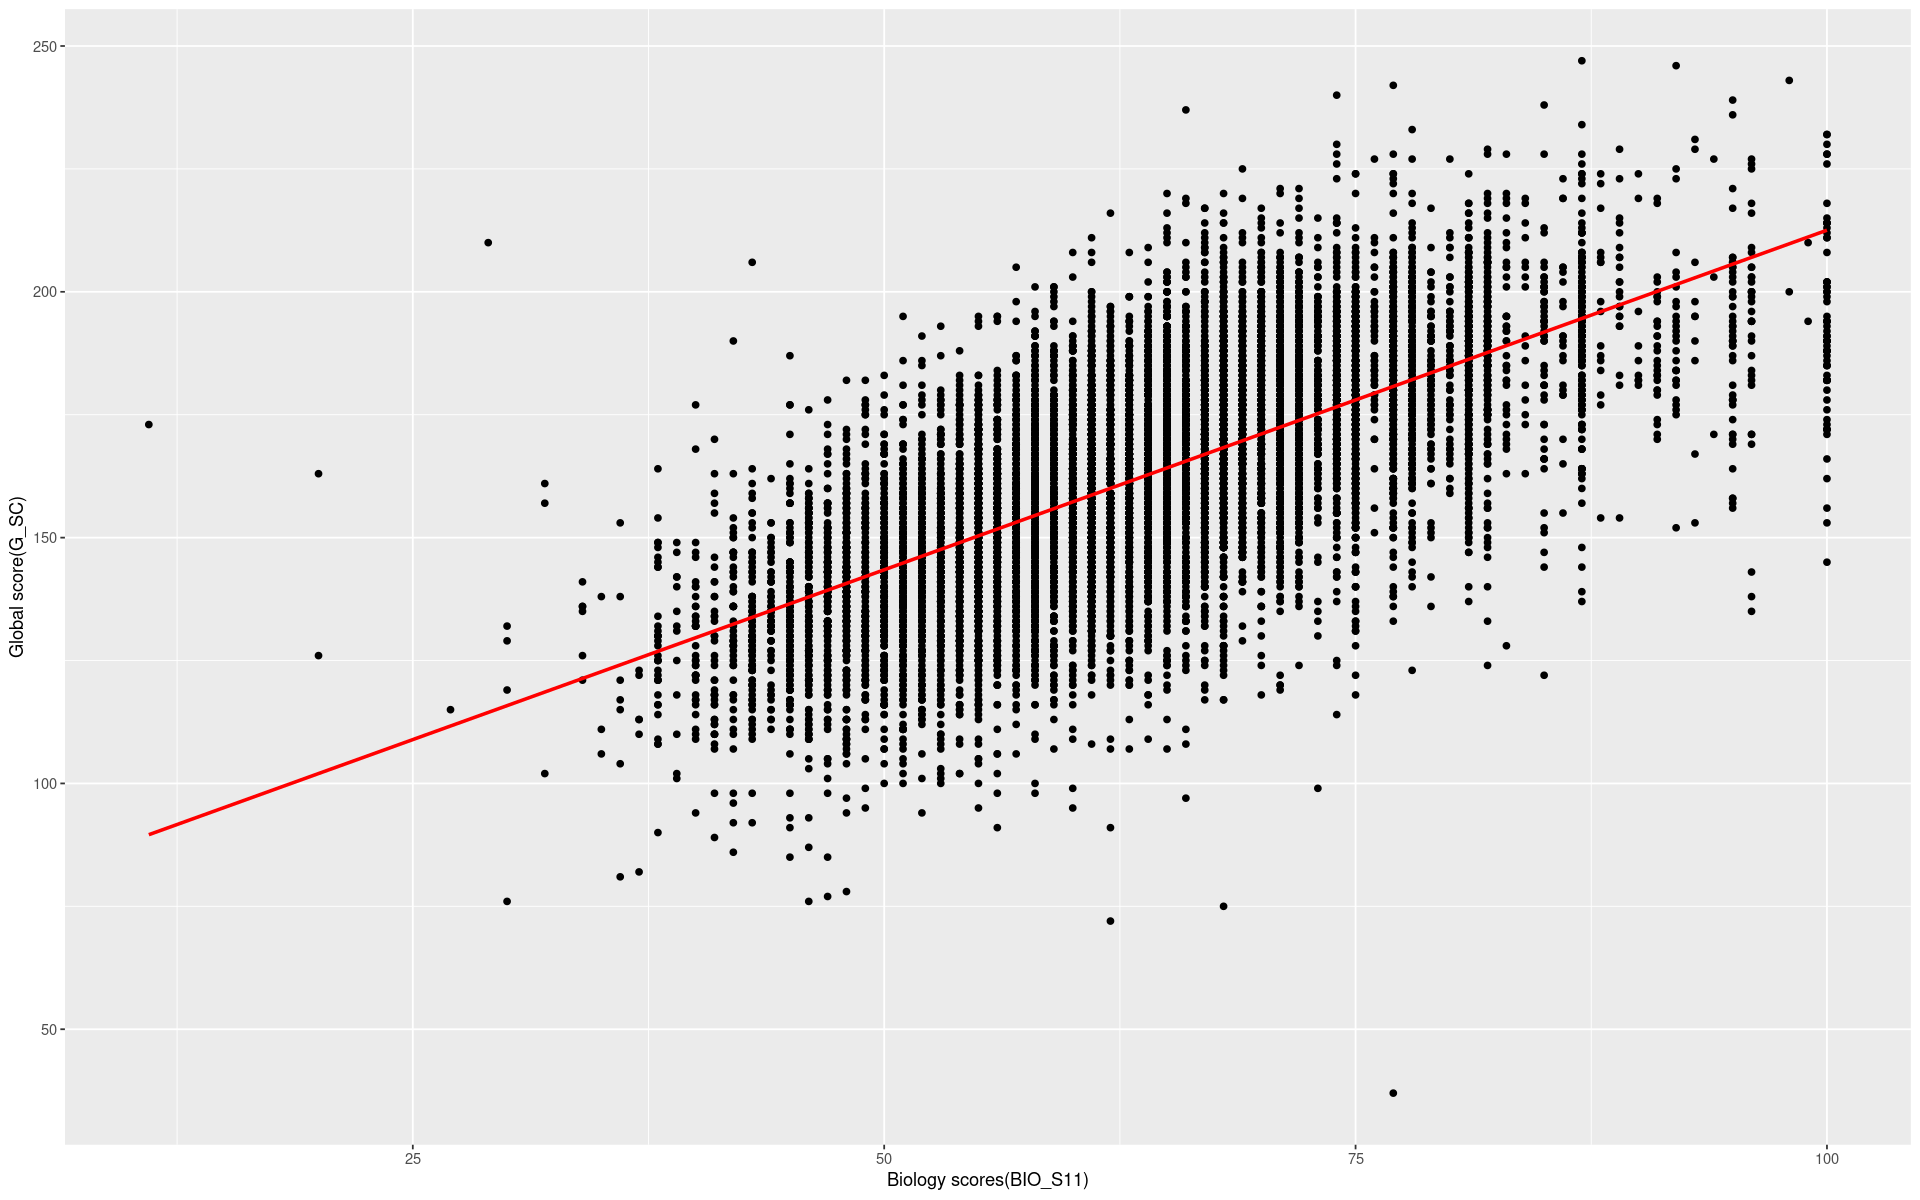

In [181]:
#Scatterplot relationship, G_SC and BIO_S11
scatter <- ggplot(clean_data, aes(clean_data$BIO_S11, clean_data$G_SC))

#Add a regression line
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red", se = F) + labs(x = "Biology scores(BIO_S11)", y = "Global score(G_SC)") 


In [188]:
# Pearson test Biology
stats::cor.test(clean_data$G_SC, clean_data$BIO_S11, method='pearson')


	Pearson's product-moment correlation

data:  clean_data$G_SC and clean_data$BIO_S11
t = 99.076, df = 12271, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6567044 0.6763658
sample estimates:
     cor 
0.666651 


Warning message:
“Use of `clean_data$ENG_S11` is discouraged. Use `ENG_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
Warning message:
“Use of `clean_data$ENG_S11` is discouraged. Use `ENG_S11` instead.”
Warning message:
“Use of `clean_data$G_SC` is discouraged. Use `G_SC` instead.”
`geom_smooth()` using formula 'y ~ x'



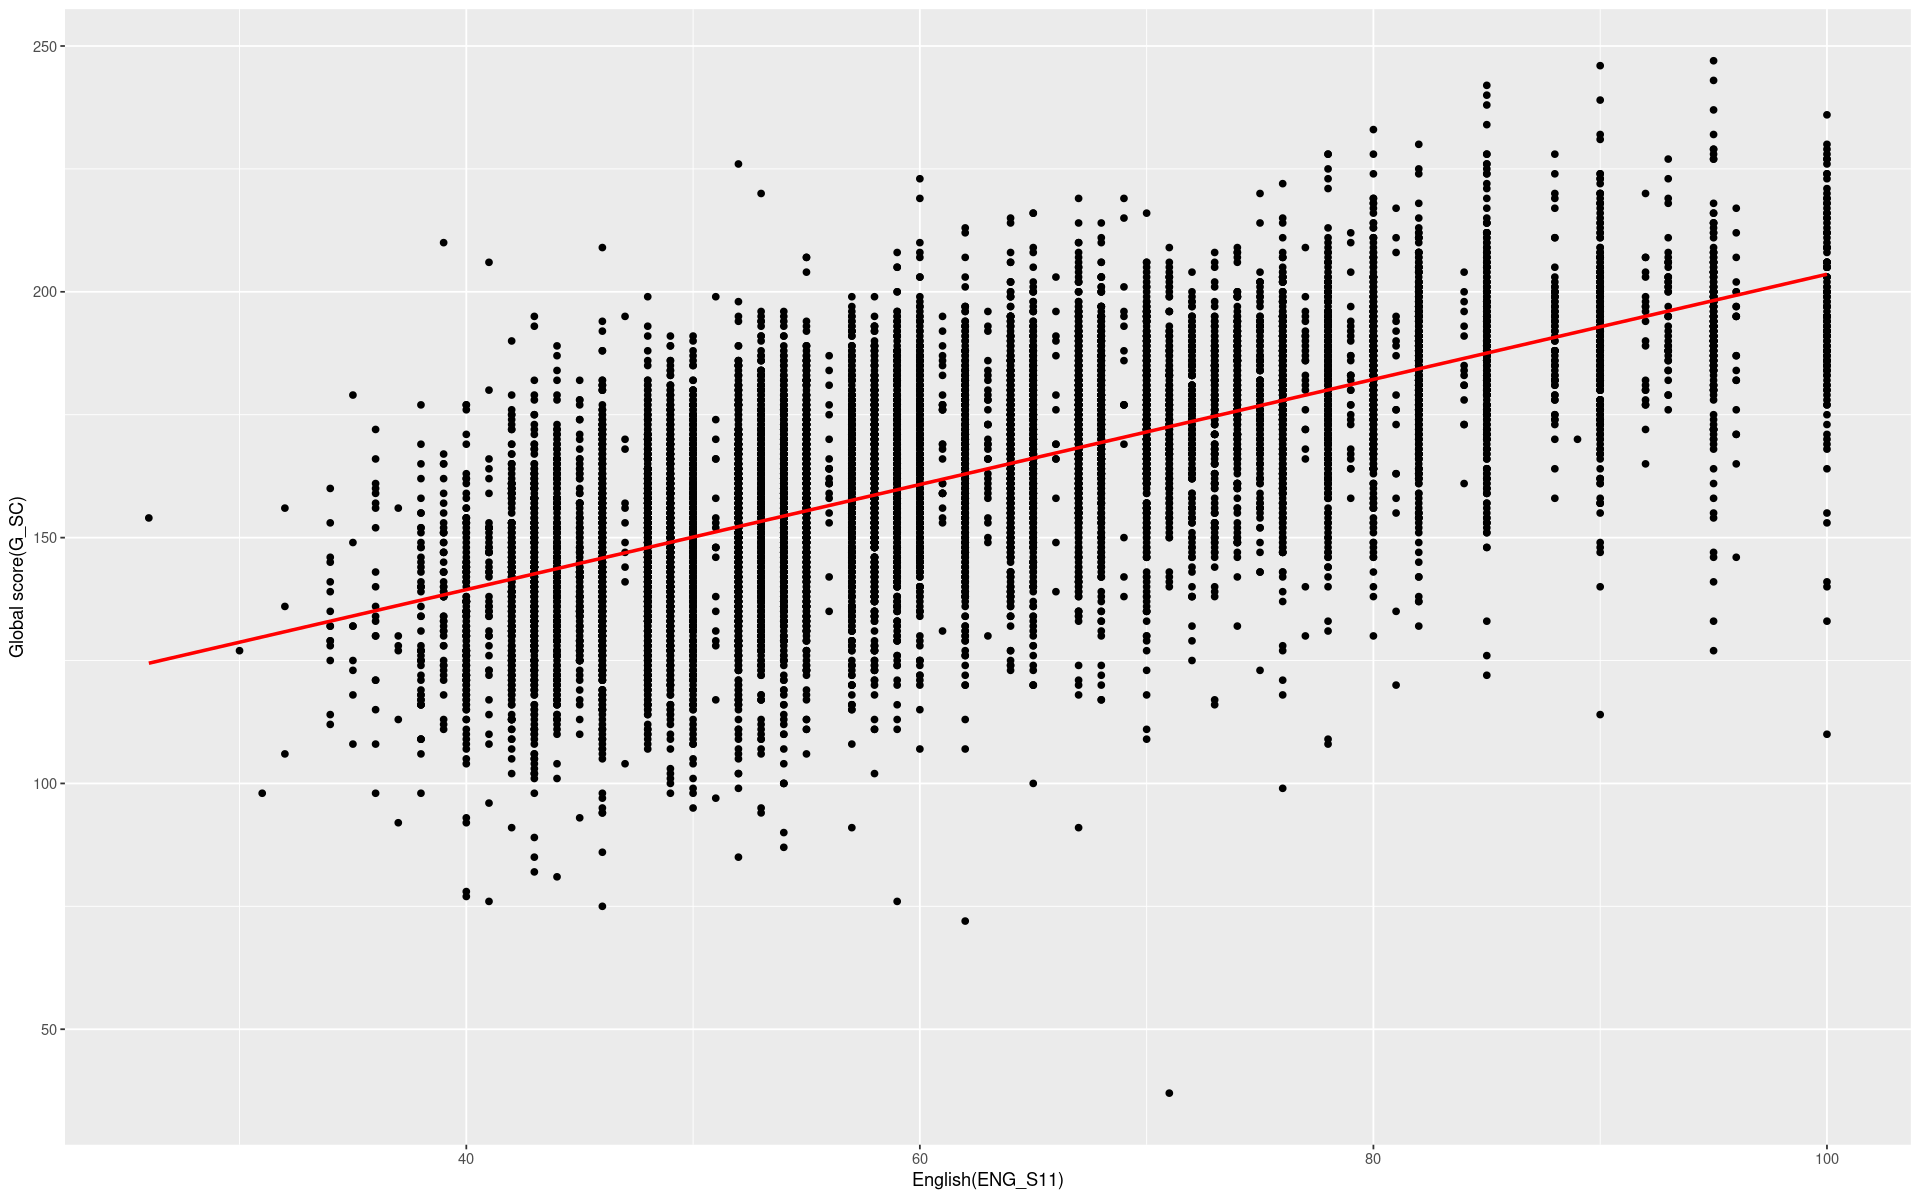

In [183]:
#Scatterplot relationship, G_SC and ENG_S11
scatter <- ggplot(clean_data, aes(clean_data$ENG_S11, clean_data$G_SC))

#Add a regression line
scatter + geom_point() + geom_smooth(method = "lm", colour = "Red", se = F) + labs(x = "English(ENG_S11)", y = "Global score(G_SC)") 


In [189]:
# Pearsons Test
stats::cor.test(clean_data$G_SC, clean_data$ENG_S11, method='pearson')


	Pearson's product-moment correlation

data:  clean_data$G_SC and clean_data$ENG_S11
t = 97.981, df = 12271, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6524859 0.6723412
sample estimates:
      cor 
0.6625299 


## Performing T-Test

In [191]:
# global grade and gender
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$GENDER, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,F,1,4985,161.3428,22.36804,162,161.5696,23.7216,76,242,166,-0.07541761,-0.2489433712,0.3168074
X12,2,M,1,7288,163.7998,23.56737,164,164.0669,25.2042,37,247,210,-0.11979768,0.0009992437,0.2760622


In [204]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ GENDER, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,11.90516,0.0005616686
,12271,NA,NA


In [205]:
# Levene's test showed unequal variance, therefore need to perform welsh modification to the t-test
# therefore set var.equal to false
# Perfomring the T-test
stats::t.test(G_SC~GENDER,var.equal=FALSE,data=clean_data)


	Welch Two Sample t-test

data:  G_SC by GENDER
t = -5.847, df = 11064, p-value = 5.146e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.280668 -1.633291
sample estimates:
mean in group F mean in group M 
       161.3428        163.7998 


In [206]:
# Performing Cohen's d
res <- stats::t.test(G_SC~GENDER,var.equal=FALSE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.1111773,0.95,-0.148471,-0.07387847


In [207]:
# global grade and Internet 
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$INTERNET, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,No,1,2591,154.6515,22.24627,154,154.6233,22.2390,76,228,152,-0.002749003,-0.04396598,0.4370424
X12,2,Yes,1,9682,164.9830,22.85958,166,165.3040,23.7216,37,247,210,-0.128156572,-0.05010833,0.2323195


In [208]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ INTERNET, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.929432,0.02642119
,12271,NA,NA


In [210]:
# Levene's test showed unequal variance, therefore need to perform welsh modification to the t-test
# therefore set var.equal to false
# Perfomring the T-test
stats::t.test(G_SC~INTERNET,var.equal=FALSE,data=clean_data)


	Welch Two Sample t-test

data:  G_SC by INTERNET
t = -20.874, df = 4171.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.301844  -9.361101
sample estimates:
 mean in group No mean in group Yes 
         154.6515          164.9830 


In [211]:
# Performing Cohen's d
res <- stats::t.test(G_SC~INTERNET,var.equal=FALSE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.6463793,0.95,-0.7085998,-0.584085


In [212]:
# global grade and tv 
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$TV, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,No,1,1777,155.4963,22.81948,155,155.5446,23.7216,77,228,151,-0.03581314,-0.1523557,0.5413300
X12,2,Yes,1,10496,164.0387,22.94047,164,164.2977,23.7216,37,247,210,-0.10446617,-0.0640832,0.2239187


In [213]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ TV, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.2721407,0.6019088
,12271,NA,NA


In [214]:
# Levene's test showed unequal variance, therefore need to perform welsh modification to the t-test
# therefore set var.equal to false
# Perfomring the T-test
stats::t.test(G_SC~TV,var.equal=TRUE,data=clean_data)


	Two Sample t-test

data:  G_SC by TV
t = -14.527, df = 12271, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.694949 -7.389730
sample estimates:
 mean in group No mean in group Yes 
         155.4963          164.0387 


In [215]:
# Performing Cohen's d
res <- stats::t.test(G_SC~TV,var.equal=TRUE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.2622863,0.95,-0.2978194,-0.2267591


In [216]:
# global grade and computer 
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$COMPUTER, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,No,1,2102,156.0319,21.89692,156,156.1415,22.2390,76,226,150,-0.05928148,-0.08262353,0.4776025
X12,2,Yes,1,10171,164.2010,23.11792,165,164.4970,23.7216,37,247,210,-0.11827561,-0.07141567,0.2292276


In [217]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ COMPUTER, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,11.81626,0.0005891042
,12271,NA,NA


In [218]:
stats::t.test(G_SC~COMPUTER,var.equal=FALSE,data=clean_data)


	Welch Two Sample t-test

data:  G_SC by COMPUTER
t = -15.42, df = 3146, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.207806 -7.130372
sample estimates:
 mean in group No mean in group Yes 
         156.0319          164.2010 


In [219]:
# Performing Cohen's d
res <- stats::t.test(G_SC~COMPUTER,var.equal=FALSE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.549851,0.95,-0.6210049,-0.4786162


In [224]:
# global grade and washing machine 
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$WASHING_MCH, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,No,1,4665,159.6184,22.70147,160,159.7552,23.7216,72,234,162,-0.06359069,-0.16839209,0.3323749
X12,2,Yes,1,7608,164.7538,23.15628,166,165.0591,23.7216,37,247,210,-0.12499775,-0.02178031,0.2654811


In [225]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ WASHING_MCH, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,2.709102,0.09980276
,12271,NA,NA


In [226]:
stats::t.test(G_SC~WASHING_MCH,var.equal=TRUE,data=clean_data)


	Two Sample t-test

data:  G_SC by WASHING_MCH
t = -12.015, df = 12271, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.973176 -4.297578
sample estimates:
 mean in group No mean in group Yes 
         159.6184          164.7538 


In [227]:
# Performing Cohen's d
res <- stats::t.test(G_SC~WASHING_MCH,var.equal=TRUE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.2169269,0.95,-0.2524129,-0.181432


In [228]:
# global grade and car
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$CAR, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,No,1,6498,159.0065,22.58567,159,159.1460,23.7216,72,247,175,-0.07307294,-0.09999273,0.2801838
X12,2,Yes,1,5775,167.0724,22.96720,168,167.4612,23.7216,37,246,209,-0.14793983,-0.02382498,0.3022261


In [229]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ CAR, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.957685,0.1617864
,12271,NA,NA


In [230]:
stats::t.test(G_SC~CAR,var.equal=TRUE,data=clean_data)


	Two Sample t-test

data:  G_SC by CAR
t = -19.591, df = 12271, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.872942 -7.258892
sample estimates:
 mean in group No mean in group Yes 
         159.0065          167.0724 


In [231]:
# Performing Cohen's d
res <- stats::t.test(G_SC~CAR,var.equal=TRUE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.3537103,0.95,-0.3893654,-0.3180411


In [232]:
# global grade and PHONE
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$PHONE, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,No,1,492,158.9329,22.27073,159,158.8528,23.7216,97,220,123,0.02404992,-0.23259976,1.0040419
X12,2,Yes,1,11781,162.9634,23.13991,163,163.2111,23.7216,37,247,210,-0.10121720,-0.07829814,0.2131918


In [233]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ PHONE, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.24858,0.2638458
,12271,NA,NA


In [234]:
stats::t.test(G_SC~PHONE,var.equal=TRUE,data=clean_data)


	Two Sample t-test

data:  G_SC by PHONE
t = -3.7908, df = 12271, p-value = 0.0001509
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.114561 -1.946416
sample estimates:
 mean in group No mean in group Yes 
         158.9329          162.9634 


In [235]:
# Performing Cohen's d
res <- stats::t.test(G_SC~PHONE,var.equal=TRUE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.06844249,0.95,-0.103838,-0.0330442


In [237]:
# global grade and MOBILE
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$MOBILE, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,No,1,3501,155.5496,22.42452,155,155.5223,23.7216,75,232,157,-0.01204472,-0.07416580,0.3789894
X12,2,Yes,1,8772,165.6963,22.75423,167,166.0380,23.7216,37,247,210,-0.13532009,-0.03209327,0.2429477


In [238]:
# Using levene's test to test variance, pvalue needs to be greater than 0.05
car::leveneTest(G_SC ~ MOBILE, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.70939,0.191089
,12271,NA,NA


In [239]:
stats::t.test(G_SC~MOBILE,var.equal=TRUE,data=clean_data)


	Two Sample t-test

data:  G_SC by MOBILE
t = -22.399, df = 12271, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.034710  -9.258788
sample estimates:
 mean in group No mean in group Yes 
         155.5496          165.6963 


In [240]:
# Performing Cohen's d
res <- stats::t.test(G_SC~MOBILE,var.equal=TRUE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,-0.4044027,0.95,-0.440141,-0.3686482


In [285]:
# testing on school nature
# Describe the variables
psych::describeBy(clean_data$G_SC, clean_data$SCHOOL_NAT, mat=TRUE)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,PRIVATE,1,6565,168.2158,22.82366,170,168.7379,23.7216,37,247,210,-0.20406097,0.02424670,0.2816877
X12,2,PUBLIC,1,5846,156.5281,21.83817,157,156.5667,22.2390,72,228,156,-0.05215938,-0.01912125,0.2856189


In [286]:
car::leveneTest(G_SC ~ SCHOOL_NAT, data=clean_data)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,12.61399,0.0003842897
,12409,NA,NA


In [287]:
stats::t.test(G_SC~SCHOOL_NAT,var.equal=FALSE,data=clean_data)


	Welch Two Sample t-test

data:  G_SC by SCHOOL_NAT
t = 29.135, df = 12345, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.90146 12.47412
sample estimates:
mean in group PRIVATE  mean in group PUBLIC 
             168.2158              156.5281 


In [288]:
# Performing Cohen's d
res <- stats::t.test(G_SC~SCHOOL_NAT,var.equal=FALSE,data=clean_data)
effcd=round((2*res$statistic)/sqrt(res$parameter),2)
effectsize::t_to_d(t = res$statistic, res$parameter)

,d,CI,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>
t,0.5244463,0.95,0.4885545,0.5603174


## Anova Test

In [242]:
colnames(clean_data)

[1] "GENDER"       "EDU_FATHER"   "EDU_MOTHER"   "OCC_FATHER"   "OCC_MOTHER"  
 [6] "SISBEN"       "PEOPLE_HOUSE" "INTERNET"     "TV"           "COMPUTER"    
[11] "WASHING_MCH"  "MIC_OVEN"     "CAR"          "DVD"          "PHONE"       
[16] "MOBILE"       "REVENUE"      "JOB"          "SCHOOL_NAT"   "SCHOOL_TYPE" 
[21] "MAT_S11"      "CR_S11"       "BIO_S11"      "ENG_S11"      "G_SC"

In [247]:
clean_data

,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,SISBEN,PEOPLE_HOUSE,INTERNET,TV,COMPUTER,⋯,MOBILE,REVENUE,JOB,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,BIO_S11,ENG_S11,G_SC
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,ACADEMIC,71,81,86,82,180
2,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,83,75,100,88,182
3,M,Not sure,Not sure,Independent,Home,Level 2,Five,No,No,Yes,⋯,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",PRIVATE,ACADEMIC,52,49,46,42,113
4,F,Not sure,Not sure,Other occupation,Independent,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 2 and less than 3 LMMW,No,PRIVATE,ACADEMIC,56,55,64,73,157
5,M,Complete professional education,Complete professional education,Executive,Home,It is not classified by the SISBEN,One,Yes,Yes,Yes,⋯,Yes,Between 7 and less than 10 LMMW,No,PRIVATE,ACADEMIC,80,65,85,92,198
6,F,Complete professional education,Complete professional education,Independent,Executive,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,60,61,82,154
7,M,Complete professional education,Complete professional education,Small entrepreneur,Executive,It is not classified by the SISBEN,Four,Yes,Yes,Yes,⋯,Yes,10 or more LMMW,No,PRIVATE,ACADEMIC,71,75,75,85,152
8,F,Incomplete Secundary,Complete Secundary,Entrepreneur,Independent professional,It is not classified by the SISBEN,Five,Yes,Yes,Yes,⋯,No,10 or more LMMW,No,PRIVATE,ACADEMIC,74,67,85,96,200
9,M,Complete Secundary,Complete professional education,Independent,Operator,It is not classified by the SISBEN,Three,Yes,Yes,Yes,⋯,Yes,Between 1 and less than 2 LMMW,No,PRIVATE,TECHNICAL,44,54,44,46,133


In [265]:
# Anova test for fathers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$EDU_FATHER, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ EDU_FATHER, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,0,1,391,155.0767,20.05721,155,155.5847,19.2738,77,203,126,-0.319316625,0.26313358,1.0143365
X12,2,Complete primary,1,824,155.1954,22.41077,155,155.3167,23.7216,78,230,152,-0.068956147,-0.01017332,0.7807160
X13,3,Complete professional education,1,3016,167.7659,23.03009,169,168.2722,23.7216,76,247,171,-0.192568623,-0.05091930,0.4193532
X14,4,Complete Secundary,1,2843,158.7858,22.11429,159,158.9727,22.2390,72,228,156,-0.083178441,-0.16393402,0.4147482
X15,5,Complete technique or technology,1,1194,164.0335,22.16536,164,164.1956,22.2390,75,228,153,-0.094250336,-0.18468672,0.6414645
X16,6,Incomplete primary,1,735,155.7293,20.94241,156,155.7997,22.2390,81,232,151,-0.006001731,-0.07957150,0.7724725
X17,7,Incomplete Professional Education,1,425,166.9176,22.68520,168,168.0469,22.2390,37,228,191,-0.763087611,2.25416563,1.1003937
X18,8,Incomplete Secundary,1,1091,156.5353,21.73699,157,156.5968,23.7216,76,220,144,-0.046850283,-0.15254558,0.6580926
X19,9,Incomplete technical or technological,1,277,162.1011,21.88120,162,162.5247,22.2390,99,224,125,-0.136742639,-0.28886554,1.3147138



	Bartlett test of homogeneity of variances

data:  G_SC by EDU_FATHER
Bartlett's K-squared = 24.643, df = 11, p-value = 0.01028


In [262]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$EDU_FATHER),y=clean_data$G_SC,posthoc='games-howell')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ EDU_FATHER, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=EDU_FATHER (groups: 0, Complete primary, Complete professional education, Complete Secundary, Complete technique or technology, Incomplete primary, Incomplete Professional Education, Incomplete Secundary, Incomplete technical or technological, Ninguno, Not sure, Postgraduate education)

Omega squared: 95% CI = [.07; .08], point estimate = .08
Eta Squared: 95% CI = [.07; .08], point estimate = .08

                                       SS    Df       MS     F     p
Between groups (error + effect) 505340.92    11 45940.08 93.01 <.001
Within groups (error only)      6123915.9 12399    493.9            


### Post hoc test: games-howell

                                                                          diff
Complete primary-0                                                        0.12
Complete professional education-0                                        12.69
Complete Secundary-0                                                      3.71
Complet

[1] 93.01419

[1] 6.875711e-204

,etasq
,<dbl>
1,0.07622889


### Next

In [266]:
# Anova test for mothers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$EDU_MOTHER, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ EDU_MOTHER, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,0,1,388,154.9304,19.95415,155.0,155.3269,19.2738,77,205,128,-0.27478298,0.320965745,1.0130187
X12,2,Complete primary,1,713,155.3366,22.01229,155.0,155.2224,22.2390,81,230,149,0.05076935,-0.026313840,0.8243668
X13,3,Complete professional education,1,3059,168.8454,22.97832,170.0,169.3042,23.7216,91,246,155,-0.15360761,-0.143721793,0.4154594
X14,4,Complete Secundary,1,3106,158.4707,21.94960,159.0,158.6122,22.2390,76,247,171,-0.06963512,-0.097759442,0.3938454
X15,5,Complete technique or technology,1,1495,163.2421,21.94349,163.0,163.4311,23.7216,91,234,143,-0.07966635,-0.257586433,0.5675253
X16,6,Incomplete primary,1,541,154.8540,21.63602,155.0,154.9492,23.7216,94,232,138,-0.00391625,-0.169809064,0.9302053
X17,7,Incomplete Professional Education,1,502,166.6853,22.93183,168.0,167.3284,22.2390,37,243,206,-0.51750744,2.101115422,1.0234976
X18,8,Incomplete Secundary,1,1056,155.6723,21.92864,156.0,155.9054,23.7216,72,210,138,-0.19432538,-0.039150313,0.6748071
X19,9,Incomplete technical or technological,1,341,161.8798,20.74439,164.0,162.3956,20.7564,102,214,112,-0.25478594,-0.197362931,1.1233716



	Bartlett test of homogeneity of variances

data:  G_SC by EDU_MOTHER
Bartlett's K-squared = 33.415, df = 11, p-value = 0.0004506


In [270]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$EDU_MOTHER),y=clean_data$G_SC,posthoc='games-howell')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ EDU_MOTHER, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=EDU_MOTHER (groups: 0, Complete primary, Complete professional education, Complete Secundary, Complete technique or technology, Incomplete primary, Incomplete Professional Education, Incomplete Secundary, Incomplete technical or technological, Ninguno, Not sure, Postgraduate education)

Omega squared: 95% CI = [.07; .08], point estimate = .07
Eta Squared: 95% CI = [.07; .08], point estimate = .08

                                        SS    Df       MS     F     p
Between groups (error + effect)  501803.16    11 45618.47 92.31 <.001
Within groups (error only)      6127453.66 12399   494.19            


### Post hoc test: games-howell

                                                                          diff
Complete primary-0                                                        0.41
Complete professional education-0                                        13.91
Complete Secundary-0                                                      3.54
Comp

[1] 92.3097

[1] 2.390902e-202

,etasq
,<dbl>
1,0.07569524


## next

In [ ]:
# this should be a t-test actually

In [268]:
# Anova test for mothers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$OCC_FATHER, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ OCC_FATHER, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,0,1,940,163.9085,22.93483,164.0,164.2819,25.2042,77,229,152,-0.149488369,-0.10950680,0.7480517
X12,2,Auxiliary or Administrative,1,372,161.3441,22.91364,162.0,161.8154,25.2042,91,214,123,-0.190084814,-0.38983217,1.1880169
X13,3,Entrepreneur,1,472,168.6992,23.89260,169.0,169.3704,26.6868,91,230,139,-0.222013003,-0.45221210,1.0997459
X14,4,Executive,1,1077,169.7465,23.47002,172.0,170.6454,22.2390,37,243,206,-0.409934747,0.79598873,0.7151639
X15,5,Home,1,77,161.2078,22.24347,162.0,161.0317,19.2738,104,219,115,0.071955720,-0.12029853,2.5348789
X16,6,Independent,1,2907,158.7262,22.68670,158.0,158.7172,23.7216,81,233,152,-0.005740055,-0.10633722,0.4207738
X17,7,Independent professional,1,915,167.8350,23.67657,169.0,168.3670,25.2042,94,238,144,-0.186094045,-0.19047001,0.7827233
X18,8,Operator,1,1537,158.2062,21.73574,159.0,158.4752,22.2390,76,247,171,-0.101304354,0.09484946,0.5544183
X19,9,Other occupation,1,1087,160.1012,21.90085,160.0,160.0689,22.2390,76,240,164,-0.002787130,0.13229487,0.6642724



	Bartlett test of homogeneity of variances

data:  G_SC by OCC_FATHER
Bartlett's K-squared = 22.849, df = 11, p-value = 0.01856


In [271]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$OCC_FATHER),y=clean_data$G_SC,posthoc='games-howell')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ OCC_FATHER, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=OCC_FATHER (groups: 0, Auxiliary or Administrative, Entrepreneur, Executive, Home, Independent, Independent professional, Operator, Other occupation, Retired, Small entrepreneur, Technical or professional level employee)

Omega squared: 95% CI = [.02; .04], point estimate = .03
Eta Squared: 95% CI = [.03; .04], point estimate = .03

                                        SS    Df       MS     F     p
Between groups (error + effect)  203632.83    11 18512.08 35.72 <.001
Within groups (error only)      6425623.99 12399   518.24            


### Post hoc test: games-howell

                                                                       diff
Auxiliary or Administrative-0                                         -2.56
Entrepreneur-0                                                         4.79
Executive-0                                                            5.84
Home-0                                                                -2.70
Indepe

[1] 35.72124

[1] 3.552204e-76

,etasq
,<dbl>
1,0.03071729


## Next

In [272]:
# Anova test for mothers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$OCC_MOTHER, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ OCC_MOTHER, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,0,1,313,157.1150,20.31939,158.0,157.8566,20.7564,77,208,131,-0.37754313,0.259157287,1.1485200
X12,2,Auxiliary or Administrative,1,846,163.8558,21.90945,166.0,164.3776,22.2390,95,229,134,-0.21648099,-0.344442268,0.7532625
X13,3,Entrepreneur,1,242,168.9339,24.81374,170.0,169.5825,28.1694,89,227,138,-0.24147788,-0.436063793,1.5950877
X14,4,Executive,1,794,169.5856,23.53261,171.0,170.0204,25.9455,75,242,167,-0.18639919,-0.184083411,0.8351412
X15,5,Home,1,4658,159.9298,22.84407,160.0,160.0531,23.7216,72,247,175,-0.05273373,-0.045290751,0.3347139
X16,6,Independent,1,1107,158.9512,22.45074,159.0,159.2232,23.7216,77,233,156,-0.08010661,-0.288794565,0.6747716
X17,7,Independent professional,1,715,170.1846,24.38428,172.0,171.1152,25.2042,37,238,201,-0.49894789,0.996417298,0.9119205
X18,8,Operator,1,684,160.4488,21.36619,159.5,160.2865,22.9803,101,219,118,0.05225616,-0.347121075,0.8169568
X19,9,Other occupation,1,607,158.9819,22.75587,159.0,158.9651,23.7216,98,240,142,0.07991981,-0.139678170,0.9236323



	Bartlett test of homogeneity of variances

data:  G_SC by OCC_MOTHER
Bartlett's K-squared = 30.83, df = 11, p-value = 0.001172


In [273]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$OCC_MOTHER),y=clean_data$G_SC,posthoc='games-howell')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ OCC_MOTHER, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=OCC_MOTHER (groups: 0, Auxiliary or Administrative, Entrepreneur, Executive, Home, Independent, Independent professional, Operator, Other occupation, Retired, Small entrepreneur, Technical or professional level employee)

Omega squared: 95% CI = [.02; .04], point estimate = .03
Eta Squared: 95% CI = [.02; .03], point estimate = .03

                                       SS    Df       MS     F     p
Between groups (error + effect) 201504.82    11 18318.62 35.34 <.001
Within groups (error only)        6427752 12399   518.41            


### Post hoc test: games-howell

                                                                       diff
Auxiliary or Administrative-0                                          6.74
Entrepreneur-0                                                        11.82
Executive-0                                                           12.47
Home-0                                                                 2.81
Independe

[1] 35.33624

[1] 2.639916e-75

,etasq
,<dbl>
1,0.03039629


## next

In [274]:
# Anova test for mothers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$PEOPLE_HOUSE, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ PEOPLE_HOUSE, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,0,1,21,158.6190,20.08601,156.0,158.9412,20.7564,116,196,80,-0.14713638,-0.660156309,4.3831258
X12,2,Eight,1,164,155.0244,21.35644,152.5,154.6591,21.4977,108,209,101,0.19309770,-0.529465255,1.6676578
X13,3,Five,1,2870,162.4021,22.80693,162.0,162.6215,23.7216,72,237,165,-0.10378400,-0.057447288,0.4257218
X14,4,Four,1,4767,163.6153,23.00514,164.0,163.8553,23.7216,76,247,171,-0.07614269,-0.166682274,0.3331979
X15,5,Nueve,1,74,155.8784,22.73971,154.5,155.5833,22.2390,99,201,102,0.11267907,-0.445440152,2.6434381
X16,6,Once,1,19,162.4737,20.21377,166.0,161.4706,13.3434,128,214,86,0.41386014,0.206381814,4.6373568
X17,7,One,1,13,163.3846,28.97280,156.0,161.3636,22.2390,129,220,91,0.75967603,-0.876379131,8.0356086
X18,8,Seven,1,372,159.0699,23.33144,158.0,159.0503,23.7216,78,236,158,-0.04154776,0.383376470,1.2096790
X19,9,Six,1,1090,160.1450,22.40464,161.0,160.3222,23.7216,91,228,137,-0.06556626,-0.271817747,0.6786170



	Bartlett test of homogeneity of variances

data:  G_SC by PEOPLE_HOUSE
Bartlett's K-squared = 15.43, df = 12, p-value = 0.2188


In [275]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$PEOPLE_HOUSE),y=clean_data$G_SC,posthoc='Tukey')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ PEOPLE_HOUSE, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=PEOPLE_HOUSE (groups: 0, Eight, Five, Four, Nueve, Once, One, Seven, Six, Ten, Three, Twelve or more, Two)

Omega squared: 95% CI = [0; .01], point estimate = 0
Eta Squared: 95% CI = [0; .01], point estimate = .01

                                        SS    Df      MS    F     p
Between groups (error + effect)   36513.69    12 3042.81 5.72 <.001
Within groups (error only)      6592743.13 12398  531.76           


### Post hoc test: Tukey

                     diff  lwr    upr   p adj
Eight-0              -3.59 -21.3  14.11 1.000
Five-0               3.78  -12.95 20.52 1.000
Four-0               5     -11.71 21.71 .999 
Nueve-0              -2.74 -21.63 16.15 1.000
Once-0               3.85  -20.34 28.05 1.000
One-0                4.77  -22.2  31.73 1.000
Seven-0              0.45  -16.69 17.59 1.000
Six-0                1.53  -15.31 18.36 1.000
Ten-0                0.59  -19.16 20.35 1.000
Three-0              4.64  -12.11 21.38 .999 
Twelve or mor

[1] 5.72216

[1] 6.094825e-10

,etasq
,<dbl>
1,0.005507962


## NEXT

In [276]:
# Anova test for mothers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$REVENUE, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ REVENUE, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,0,1,279,169.7168,22.63700,172,170.7244,22.2390,37,228,191,-0.943347983,3.641999614,1.3552419
X12,2,10 or more LMMW,1,718,183.6727,20.72211,185,184.2622,19.2738,114,246,132,-0.280403866,0.326046072,0.7733424
X13,3,Between 1 and less than 2 LMMW,1,3873,156.7705,22.04578,157,156.7670,22.2390,75,237,162,-0.014011136,-0.033082696,0.3542433
X14,4,Between 2 and less than 3 LMMW,1,2783,160.9429,21.63347,162,161.2236,22.2390,72,247,175,-0.122777144,-0.096571942,0.4100810
X15,5,Between 3 and less than 5 LMMW,1,2239,165.3363,22.07567,167,165.7959,22.2390,91,238,147,-0.170770997,-0.206646615,0.4665377
X16,6,Between 5 and less than 7 LMMW,1,973,170.8602,21.78682,172,171.5212,23.7216,76,239,163,-0.310366669,0.352605142,0.6984535
X17,7,Between 7 and less than 10 LMMW,1,509,176.1768,19.96434,178,176.9487,19.2738,118,240,122,-0.290540077,0.008686752,0.8849039
X18,8,less than 1 LMMW,1,1037,153.3144,22.01468,153,153.2575,22.2390,81,226,145,0.003089345,-0.036601838,0.6836331



	Bartlett test of homogeneity of variances

data:  G_SC by REVENUE
Bartlett's K-squared = 14.006, df = 7, p-value = 0.05108


In [277]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$REVENUE),y=clean_data$G_SC,posthoc='Tukey')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ REVENUE, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=REVENUE (groups: 0, 10 or more LMMW, Between 1 and less than 2 LMMW, Between 2 and less than 3 LMMW, Between 3 and less than 5 LMMW, Between 5 and less than 7 LMMW, Between 7 and less than 10 LMMW, less than 1 LMMW)

Omega squared: 95% CI = [.1; .12], point estimate = .11
Eta Squared: 95% CI = [.1; .12], point estimate = .11

                                        SS    Df        MS      F     p
Between groups (error + effect)   738464.9     7 105494.99 222.12 <.001
Within groups (error only)      5890791.92 12403    474.95             


### Post hoc test: Tukey

                                                               diff   lwr   
10 or more LMMW-0                                              13.96  9.3   
Between 1 and less than 2 LMMW-0                               -12.95 -17.04
Between 2 and less than 3 LMMW-0                               -8.77  -12.92
Between 3 and less than 5 LMMW-0                               -4.38  -8.57 
Between 5

[1] 222.1186

[1] 3.136126e-312

,etasq
,<dbl>
1,0.1113948


## next

In [284]:
# this should be a t-test actually

In [278]:
# Anova test for mothers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$SCHOOL_NAT, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ SCHOOL_NAT, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,PRIVATE,1,6565,168.2158,22.82366,170,168.7379,23.7216,37,247,210,-0.20406097,0.02424670,0.2816877
X12,2,PUBLIC,1,5846,156.5281,21.83817,157,156.5667,22.2390,72,228,156,-0.05215938,-0.01912125,0.2856189



	Bartlett test of homogeneity of variances

data:  G_SC by SCHOOL_NAT
Bartlett's K-squared = 12.021, df = 1, p-value = 0.0005259


In [279]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$SCHOOL_NAT),y=clean_data$G_SC,posthoc='Tukey')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ SCHOOL_NAT, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=SCHOOL_NAT (groups: PRIVATE, PUBLIC)

Omega squared: 95% CI = [.06; .07], point estimate = .06
Eta Squared: 95% CI = [.06; .07], point estimate = .06

                                        SS    Df        MS      F     p
Between groups (error + effect)  422426.77     1 422426.77 844.54 <.001
Within groups (error only)      6206830.05 12409    500.19             


### Post hoc test: Tukey

               diff   lwr    upr   p adj
PUBLIC-PRIVATE -11.69 -12.48 -10.9 <.001

[1] 844.5364

[1] 1.083406e-179

,etasq
,<dbl>
1,0.06372159


## NEXT

In [280]:
# Anova test for mothers education and global grade 
# Check the statistical description of variable of interest
psych::describeBy(clean_data$G_SC, clean_data$SCHOOL_TYPE, mat=TRUE)
# performing Barrets test for homogenity of variance
stats::bartlett.test(G_SC~ SCHOOL_TYPE, data=clean_data)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X11,1,ACADEMIC,1,7834,165.8518,23.25426,167,166.2980,23.7216,37,247,210,-0.17257495,-0.006371099,0.2627307
X12,2,Not apply,1,5,150.6000,27.73626,159,150.6000,29.6520,110,179,69,-0.37780465,-1.806172947,12.4040316
X13,3,TECHNICAL,1,1059,156.8640,21.83263,157,157.0471,22.2390,77,224,147,-0.08995029,-0.137644333,0.6709006
X14,4,TECHNICAL/ACADEMIC,1,3513,157.4851,21.84494,157,157.4742,22.2390,72,228,156,-0.02166700,-0.075022716,0.3685631



	Bartlett test of homogeneity of variances

data:  G_SC by SCHOOL_TYPE
Bartlett's K-squared = 22.139, df = 3, p-value = 6.103e-05


In [283]:
# One-way Anova test 
anova_result<-userfriendlyscience::oneway(as.factor(clean_data$SCHOOL_TYPE),y=clean_data$G_SC,posthoc='games-howell')
anova_result
# access values in order to get f-statisitc on nect step
res2<-stats::aov(G_SC~ SCHOOL_TYPE, data = clean_data)
fstat<-summary(res2)[[1]][["F value"]][[1]]
fstat
# Get the p-value
anova_p_value<-summary(res2)[[1]][["Pr(>F)"]][[1]]
anova_p_value
# Calculating the effect
aoveta<-sjstats::eta_sq(res2)[2]
aoveta

### Oneway Anova for y=G_SC and x=SCHOOL_TYPE (groups: ACADEMIC, Not apply, TECHNICAL, TECHNICAL/ACADEMIC)

Omega squared: 95% CI = [.03; .04], point estimate = .03
Eta Squared: 95% CI = [.03; .04], point estimate = .03

                                        SS    Df       MS     F     p
Between groups (error + effect)   210158.8     3 70052.93 135.4 <.001
Within groups (error only)      6419098.02 12407   517.38            


### Post hoc test: games-howell

                               diff  ci.lo ci.hi     t      df     p
Not apply-ACADEMIC           -15.25 -65.74 35.23  1.23    4.00  .643
TECHNICAL-ACADEMIC            -8.99 -10.84 -7.13 12.47 1402.93 <.001
TECHNICAL/ACADEMIC-ACADEMIC   -8.37  -9.53 -7.20 18.49 7159.30 <.001
TECHNICAL-Not apply            6.26 -44.16 56.69  0.50    4.02  .954
TECHNICAL/ACADEMIC-Not apply   6.89 -43.59 57.36  0.55    4.01  .940
TECHNICAL/ACADEMIC-TECHNICAL   0.62  -1.35  2.59  0.81 1745.07  .849

[1] 135.4001

[1] 2.560071e-86

,etasq
,<dbl>
1,0.03170171
